# Home Credit Project

# 1.Introduction

### Necessary imports

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
from scipy import stats

# dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams

# Display full outputs in each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import gc

# 1. Read in data

In [3]:
#list all files
print(os.listdir("/Users/apple/Desktop/home credit /data"))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.xlsx', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


### Read in All 7 related tables

In [4]:
application_original  = pd.read_csv('/Users/apple/Desktop/home credit /data/application_train.csv')
bureau                = pd.read_csv('/Users/apple/Desktop/home credit /data/bureau.csv')
bureau_balance        = pd.read_csv('/Users/apple/Desktop/home credit /data/bureau_balance.csv')
credit_card_balance   = pd.read_csv('/Users/apple/Desktop/home credit /data/credit_card_balance.csv')
installments_payments = pd.read_csv('/Users/apple/Desktop/home credit /data/installments_payments.csv')
pos_cash_balance      = pd.read_csv('/Users/apple/Desktop/home credit /data/POS_CASH_balance.csv')
previous_application  = pd.read_csv('/Users/apple/Desktop/home credit /data/previous_application.csv')

print('application data shape: ', application_original.shape)
print('bureau data shape: ', bureau.shape)
print('bureau_balance data shape: ', bureau_balance.shape)
print('credit_card_balance data shape: ', credit_card_balance.shape)
print('installments_payments data shape: ', installments_payments.shape)
print('pos_cash_balance data shape: ', pos_cash_balance.shape)
print('previous_application data shape: ', previous_application.shape)

application data shape:  (307511, 122)
bureau data shape:  (1716428, 17)
bureau_balance data shape:  (27299925, 3)
credit_card_balance data shape:  (3840312, 23)
installments_payments data shape:  (13605401, 8)
pos_cash_balance data shape:  (10001358, 8)
previous_application data shape:  (1670214, 37)


In [5]:
application_sampled=application_original.sample(frac=0.1,random_state=123)
application=application_sampled.copy()
bureau=bureau.sample(frac=0.1,random_state=123)
bureau_balance=bureau_balance.sample(frac=0.1,random_state=123)
credit_card_balance=credit_card_balance.sample(frac=0.1,random_state=123)
installments_payments=installments_payments.sample(frac=0.1,random_state=123)
pos_cash_balance=pos_cash_balance.sample(frac=0.1,random_state=123)
previous_application=previous_application.sample(frac=0.1,random_state=123)

print('Data after sampling ')
print('application data shape: ', application.shape)
print('bureau data shape: ', bureau.shape)
print('bureau_balance data shape: ', bureau_balance.shape)
print('credit_card_balance data shape: ', credit_card_balance.shape)
print('installments_payments data shape: ', installments_payments.shape)
print('pos_cash_balance data shape: ', pos_cash_balance.shape)
print('previous_application data shape: ', previous_application.shape)

Data after sampling 
application data shape:  (30751, 122)
bureau data shape:  (171643, 17)
bureau_balance data shape:  (2729992, 3)
credit_card_balance data shape:  (384031, 23)
installments_payments data shape:  (1360540, 8)
pos_cash_balance data shape:  (1000136, 8)
previous_application data shape:  (167021, 37)


In [6]:
#data description columns
description= pd.read_csv('/Users/apple/Desktop/home credit /data/HomeCredit_columns_description.csv',engine ='python')
description.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


# 2. First Glimpse of Application Data

In [7]:
# data structure
application.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
#format days birth and days employed
application['DAYS_BIRTH'] = abs(application['DAYS_BIRTH']/365)
application['DAYS_EMPLOYED'] = application['DAYS_EMPLOYED']/365

#remove XNA of gender 
IndexNames=application[application["CODE_GENDER"]=='XNA'].index
application.drop(IndexNames , inplace=True)

#check the summary statistics of numerical variables
application.select_dtypes(exclude=['object']).describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,30751.000000,30751.000000,30751.000000,3.075100e+04,3.075100e+04,30748.000000,3.072000e+04,30751.000000,30751.000000,30751.000000,...,30751.000000,30751.000000,30751.000000,30751.000000,26548.000000,26548.000000,26548.000000,26548.000000,26548.000000,26548.000000
mean,278804.465156,0.080225,0.414588,1.684888e+05,6.013814e+05,27229.444533,5.405981e+05,0.021007,43.943522,175.842848,...,0.008195,0.000650,0.000390,0.000293,0.006177,0.006856,0.034391,0.274220,0.275011,1.905153
std,102295.083307,0.271646,0.718205,9.650195e+04,4.072523e+05,14569.956585,3.745418e+05,0.013975,11.993149,387.849760,...,0.090155,0.025495,0.019751,0.017105,0.081651,0.107844,0.199785,0.934952,1.714500,1.870292
min,100004.000000,0.000000,0.000000,2.700000e+04,4.500000e+04,1993.500000,4.050000e+04,0.000290,21.030137,-45.498630,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190630.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,0.010006,33.950685,-7.563014,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278780.000000,0.000000,0.000000,1.485000e+05,5.147775e+05,25002.000000,4.500000e+05,0.018850,43.147945,-3.293151,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,366734.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34655.625000,6.795000e+05,0.028663,54.068493,-0.764384,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456242.000000,1.000000,10.000000,2.250000e+06,4.050000e+06,216589.500000,4.050000e+06,0.072508,69.030137,1000.665753,...,1.000000,1.000000,1.000000,1.000000,2.000000,6.000000,6.000000,17.000000,261.000000,16.000000


In [9]:
#check the unique values of categorical variables
application.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# 3. Exploratory Data Analysis

### Plot functions

In [10]:
def plot_pie(data,title):
    def make_autopct(values):
        def diy_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
        return diy_autopct
    
    plt.figure(figsize=(8,6))  
    values = data.value_counts().values
    labels = data.value_counts().index
    plt.pie(values, labels=labels, autopct=make_autopct(values),
            colors = sns.color_palette("Paired"),
            startangle = 40,wedgeprops={"linewidth":0,"edgecolor":"k"},
            shadow =True)
    
    plt.title(title,fontsize=15)

In [11]:
def distribution_plot(feature):
    #plt.figure(figsize=(10,8))
    ax = sns.distplot(application[feature],fit=norm)
    
def distribution_default_plot(feature):
    #plt.figure(figsize=(10,8))
    ax = sns.distplot(application[application["TARGET"]==1][feature])

In [12]:

rcParams['figure.figsize'] = 10,6
    
def donut_DefaultOrNot(feature,DefaultOrNot):
    feature_DefaultOrNot=application[application["TARGET"]==DefaultOrNot][feature].value_counts()
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.pie(feature_DefaultOrNot.values,autopct='%1.1f%%', shadow=True)
    ax.axis('equal')
    
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.gcf().gca().add_artist(my_circle)
    
    plt.legend(labels=feature_DefaultOrNot.index)
    plt.figure()
    
def donut_compare(feature):
    #plt.figure(figsize=(14,7))
    
    plt.subplot(121)
    application[application["TARGET"] == 0][feature].value_counts().plot.pie(
        autopct = "%1.0f%%",startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
    circle = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circle)
    plt.title("Non-defaulters: Distribution of "+feature)
    
    plt.subplot(122)
    application[application["TARGET"] == 1][feature].value_counts().plot.pie(
        autopct = "%1.0f%%",startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
    circle = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circle)
    plt.title("Defaulters: Distribution of "+feature)
    
    plt.show()
    
    
def pie_compare(feature):
    feature_repay=application[application["TARGET"]==0][feature].value_counts()
    feature_default=application[application["TARGET"]==1][feature].value_counts()
    
# create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2)#,figsize=(10,10)

# plot each pie chart in a separate subplot
    ax1.pie(feature_repay.values, labels=feature_repay.index,autopct='%1.1f%%',shadow=True,colors = sns.color_palette("Paired"))
    ax1.axis('equal')
    ax1.set_ylabel('Non default',fontsize=12)

    ax2.pie(feature_default.values, labels=feature_default.index,autopct='%1.1f%%', shadow=True,colors = sns.color_palette("Paired"))
    ax2.axis('equal')
    ax2.set_ylabel('Default',fontsize=12)
    
    plt.legend()
    plt.tight_layout()
    plt.title
    plt.show()    
    
    
def kde_plot(feature):
    sns.kdeplot(application.loc[application['TARGET'] == 0, feature],label = 'Non default',
                shade=True, color="r")
    sns.kdeplot(application.loc[application['TARGET'] == 1, feature], label = 'Default',
               shade=True, color="b")

    
def bar_plot(data,feature):
    sns.countplot(data=data,y=feature,order=data[feature].value_counts().index
                 ,palette="Blues_d")
    sns.set(rc={'figure.figsize':(10,6)})

    
def bar_compare(feature):
    fig  = plt.figure(figsize=(15,5))
    
    plt.subplot(121)
    ax1 = sns.countplot(feature,data=application[application['TARGET'] == 0],palette="GnBu",
                    order=application[application['TARGET'] == 0][feature].value_counts().index)
    ax1.set_title("Nondefaulters: " + feature)

    plt.subplot(122)
    ax2 = sns.countplot(feature,data=application[application['TARGET'] == 1],palette="OrRd",
                    order=application[application['TARGET'] == 1][feature].value_counts().index)
    ax2.set_title("Defaulters: " + feature)
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
    
    plt.show()    


def boxplot_outlier(feature):
    #fig  = plt.figure(figsize=(15,5))
    plt.subplot(121)
    ax1 = plt.boxplot(application[application["TARGET"]==0][feature])
    plt.title("Nondefaulters Outlier Detection: "+feature,fontsize=13)  

    plt.subplot(122)
    ax2 = plt.boxplot(application[application["TARGET"]==1][feature])
    plt.title("Defaulters Outlier Detection: "+feature,fontsize=13) 
    
    plt.show()

### Distribution of target variable

highly unbalanced with 90% being default.
The target variable defines weather the loan was repayed or not. Let us look at what is the distribution of loan repayment in the training dataset.

In [13]:
#Examine the distribution of the dependent variable（highly imbalanced dataset!）
application["TARGET"].value_counts()

0    28284
1     2467
Name: TARGET, dtype: int64

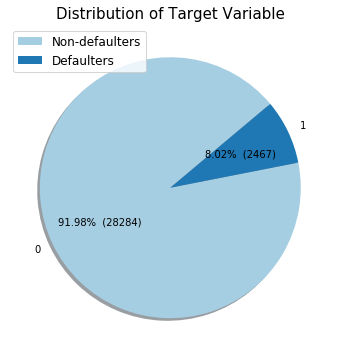

In [14]:
#use plot pie function to illustrate class imbalance
plot_pie(application["TARGET"],"Distribution of Target Variable")
#Add notation
plt.legend(labels=["Non-defaulters","Defaulters"], loc=2,fontsize=12)
plt.show()

### Basic demographic features of applicants

#### 1) Gender

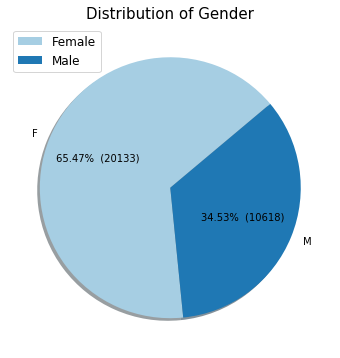

In [15]:
#plot the gender distribution
plot_pie(application["CODE_GENDER"],"Distribution of Gender")
plt.legend(labels=["Female","Male"],loc=2,fontsize=12)

Text(0, 0.5, 'Nondefaulters VS defaulters')

Text(0.5, 0, 'Count by gender')

Text(0.5, 1.0, 'Default status by gender')

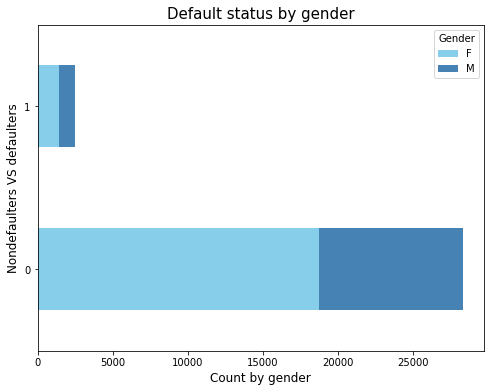

In [16]:
#use crosstab function to show default outcome by gender
ax = pd.crosstab(application["TARGET"],application["CODE_GENDER"],colnames=["Gender"]).plot(
    kind="barh",figsize=(8,6),stacked=True,color=['skyblue','steelblue'])

#add notation
plt.ylabel("Nondefaulters VS defaulters",fontsize=12)
plt.xlabel("Count by gender",fontsize=12)
plt.title("Default status by gender",fontsize=15)


#### 2) Age

Text(0.5, 1.0, 'Age of Clients')

Text(0.5, 0, 'Age (years)')

Text(0, 0.5, 'Density')

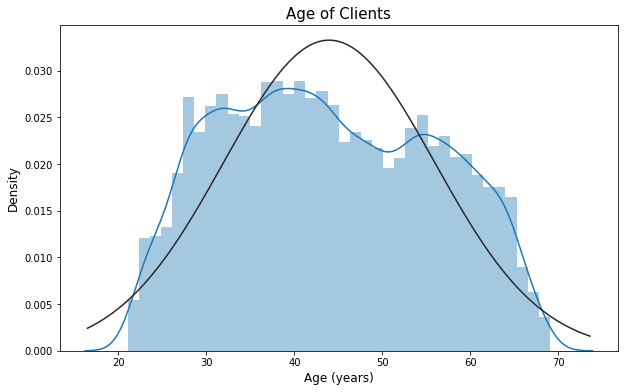

In [17]:
#distribution of customer age
sns.distplot(application["DAYS_BIRTH"],fit=stats.norm)
plt.title('Age of Clients',fontsize=15); plt.xlabel('Age (years)',fontsize=12); plt.ylabel('Density',fontsize=12)

count    30751.000000
mean        43.943522
std         11.993149
min         21.030137
25%         33.950685
50%         43.147945
75%         54.068493
max         69.030137
Name: DAYS_BIRTH, dtype: float64

,TARGET,DAYS_BIRTH
Binned_Age,,
"(20.0, 25.0]",0.108502,23.338761
"(25.0, 30.0]",0.103828,27.786509
"(30.0, 35.0]",0.100403,32.473462
"(35.0, 40.0]",0.094483,37.549387
"(40.0, 45.0]",0.081107,42.461469
"(45.0, 50.0]",0.072254,47.482209
"(50.0, 55.0]",0.073199,52.630301
"(55.0, 60.0]",0.055622,57.470778
"(60.0, 65.0]",0.049198,62.449299


<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Default Probability (%)')

Text(0.5, 1.0, 'Default Probability by Age Group')

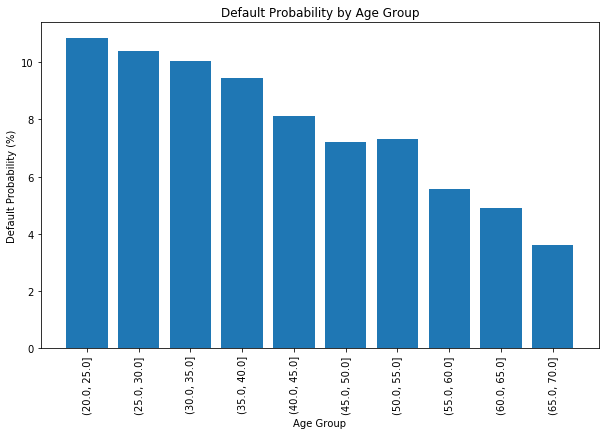

In [18]:
# creata a separate dataframe for age information
Age= application[['TARGET', 'DAYS_BIRTH']]
#get the range of age for binning
Age.DAYS_BIRTH.describe()

# Bin the age dataframe
Age['Binned_Age'] = pd.cut(Age['DAYS_BIRTH'], bins = np.linspace(20, 70, num = 11))
# Group by the age bin and calculate the average value for each bin
AgeGroup=Age.groupby('Binned_Age').mean()
AgeGroup

# Graph the age bins and the average of the target as a bar plot
plt.bar(AgeGroup.index.astype(str), AgeGroup['TARGET']*100)
plt.xticks(rotation = 90); plt.xlabel('Age Group'); plt.ylabel('Default Probability (%)')
plt.title('Default Probability by Age Group')

Text(0.5, 0, 'Age (years)')

Text(0, 0.5, 'Density')

Text(0.5, 1.0, 'Distribution of Age')

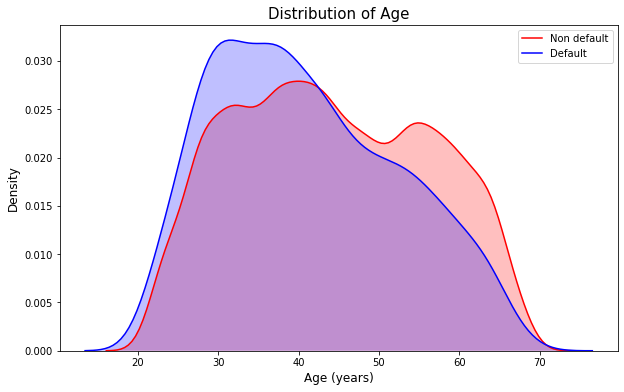

In [19]:
#show the kde plot of customer age
kde_plot("DAYS_BIRTH")
# Add notation
plt.xlabel('Age (years)',fontsize=12); plt.ylabel('Density',fontsize=12)
plt.title('Distribution of Age',fontsize=15)

### 3) Family status / number of family members & children

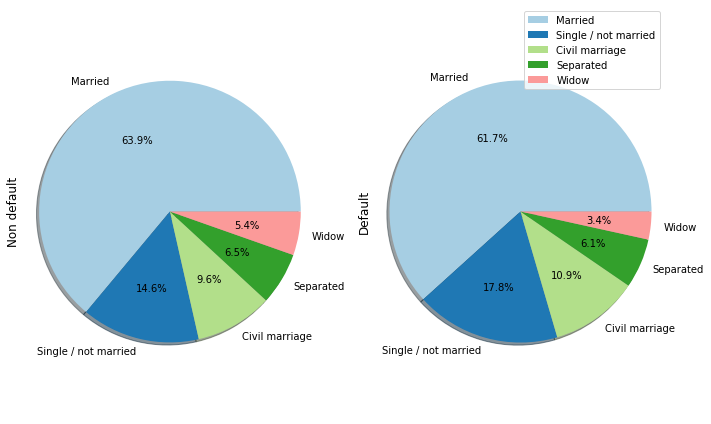

In [20]:
# comparison between nondefaulters and defaulters in terms of family status
pie_compare('NAME_FAMILY_STATUS')

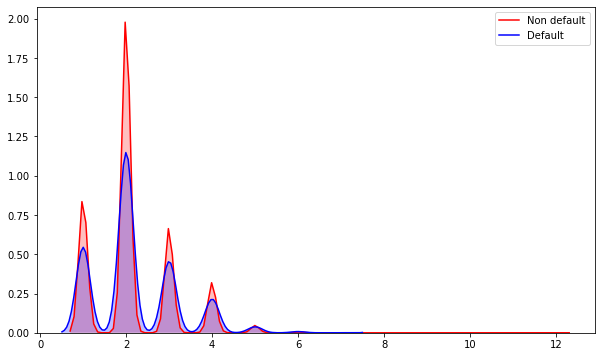

In [21]:
#Compare number of family members among defaulters and non-defaulters
kde_plot("CNT_FAM_MEMBERS")

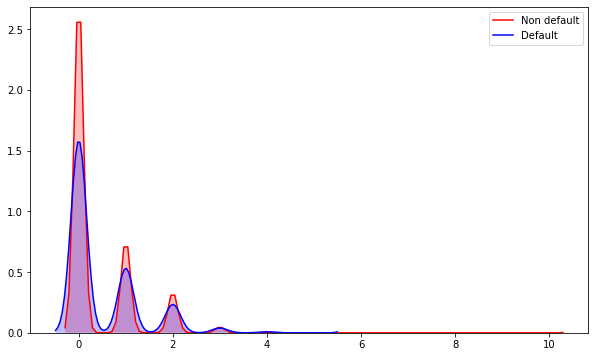

In [22]:
##Compare number of children among defaulters and non-defaulters
kde_plot("CNT_CHILDREN")

In [23]:
#boxplot_outlier("CNT_FAM_MEMBERS")
#boxplot_outlier("CNT_CHILDREN")

The majority is the married clients with the proportion of over 60%.

Married people have applied for a larger number of loan applications about 196K, However, people having Civil Marriage has the highest percentage (about 10%) of loan problems and challenges.

### 4) Education & Occupation & Income

Text(0.5, 1.0, 'Distribution of Applicants Highest Education')

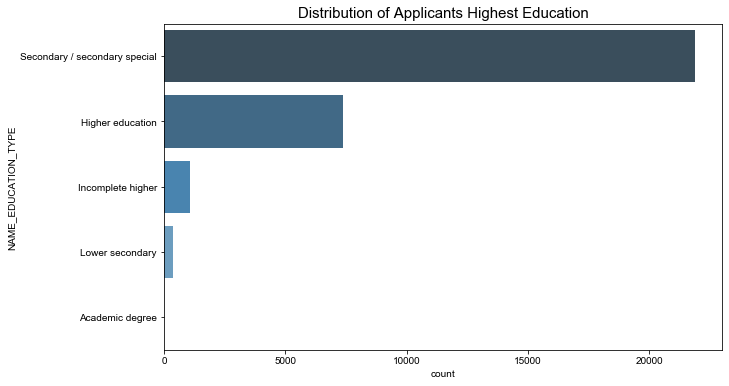

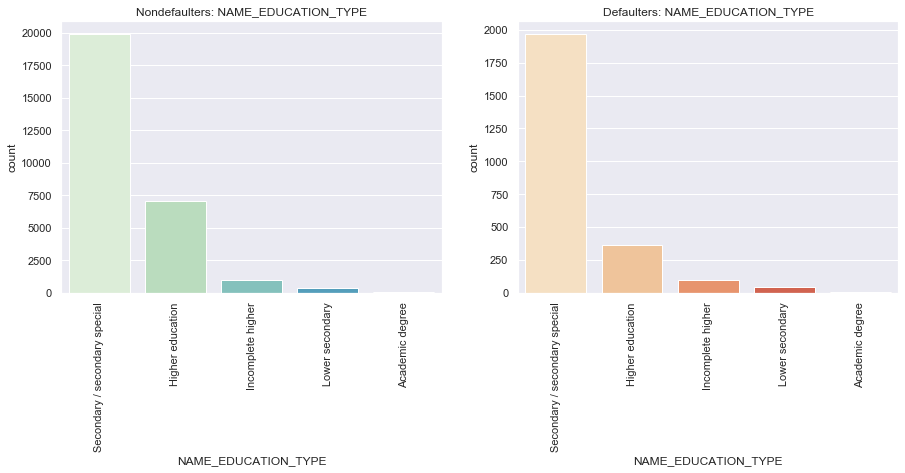

In [24]:
#show the distribution of customer education
bar_plot(application,"NAME_EDUCATION_TYPE")
plt.title("Distribution of Applicants Highest Education",fontsize=15)
bar_compare("NAME_EDUCATION_TYPE")

Text(0.5, 1.0, 'Distribution of Applicants Occupation Type')

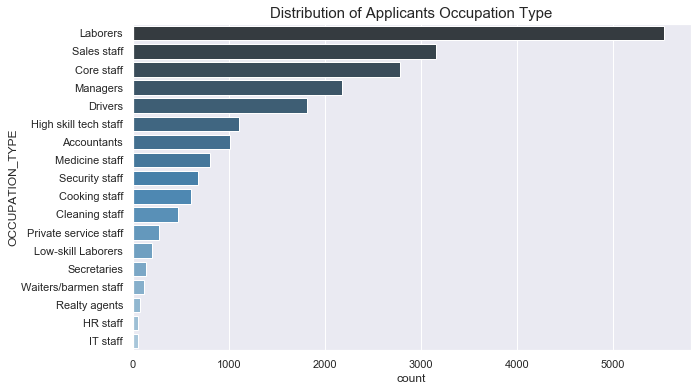

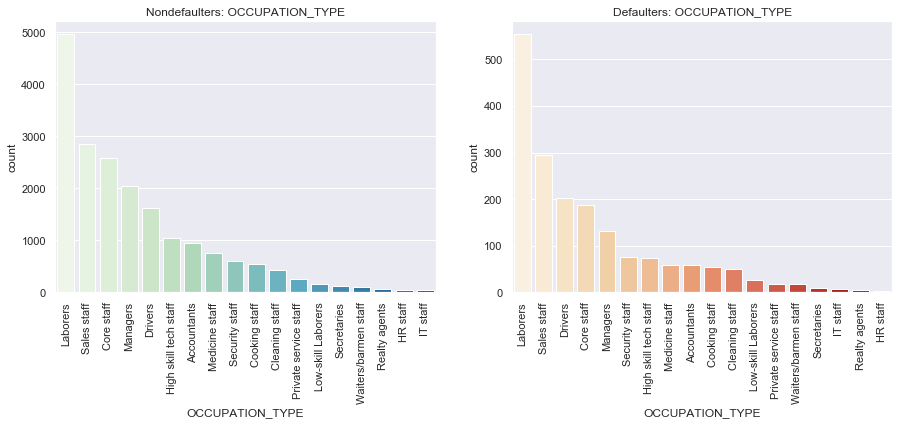

In [25]:
#show the distribution of customer occupation
bar_plot(application,"OCCUPATION_TYPE")
plt.title("Distribution of Applicants Occupation Type",fontsize=15)
bar_compare("OCCUPATION_TYPE")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

Text(0.5, 0, 'Occupation')

Text(0.5, 1.0, 'Percentage of Occupation by Repayment Status')

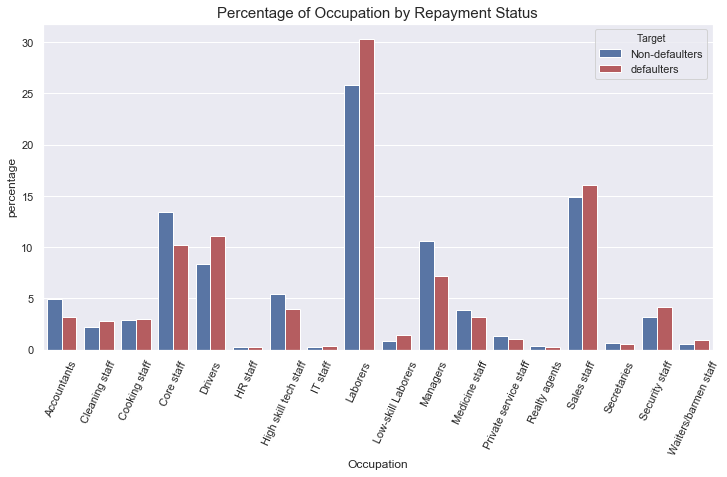

In [26]:
#compare the percentage of occupation type by default outcome
fig = plt.figure(figsize=(12,6))

ocp_non = application[application["TARGET"]==0]["OCCUPATION_TYPE"].value_counts().reset_index()
ocp_non= ocp_non.sort_values(by = "index",ascending=True)

ocp_de = application[application["TARGET"]==1]["OCCUPATION_TYPE"].value_counts().reset_index()
ocp_de = ocp_de.sort_values(by = "index",ascending=True)

ocp_non["percentage"]  = (ocp_non["OCCUPATION_TYPE"]*100/ocp_non["OCCUPATION_TYPE"].sum())
ocp_de["percentage"] = (ocp_de["OCCUPATION_TYPE"]*100/ocp_de["OCCUPATION_TYPE"].sum())

ocp_non["Target"]= "Non-defaulters"; ocp_de["Target"]= "defaulters"
occupation = pd.concat([ocp_non,ocp_de],axis=0)

sns.barplot("index","percentage",data=occupation,hue="Target",palette=["b","r"])
plt.xticks(rotation = 65);plt.xlabel("Occupation");
plt.title("Percentage of Occupation by Repayment Status",fontsize=15)


### Income 

Text(0.5, 1.0, 'Distribution of Applicants Income Type')

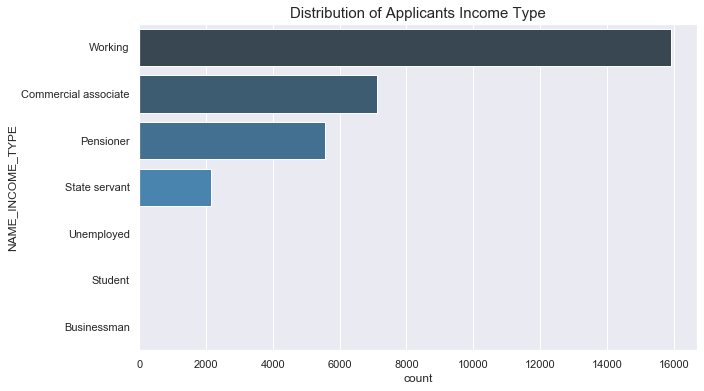

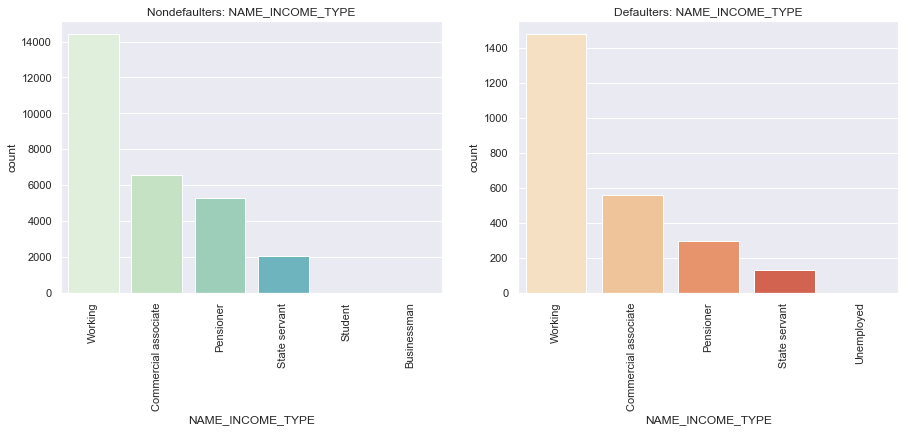

In [27]:
#plot the distribution of income type of customers
bar_plot(application,"NAME_INCOME_TYPE")
plt.title("Distribution of Applicants Income Type",fontsize=15)
bar_compare("NAME_INCOME_TYPE")

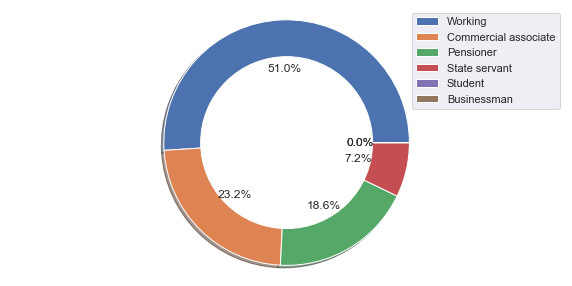

<Figure size 720x432 with 0 Axes>

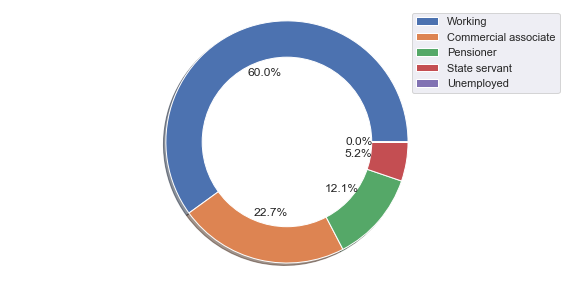

<Figure size 720x432 with 0 Axes>

In [28]:
#compare the income type distribution among defaulters and nondefaulters 
donut_DefaultOrNot('NAME_INCOME_TYPE',0)
donut_DefaultOrNot('NAME_INCOME_TYPE',1)

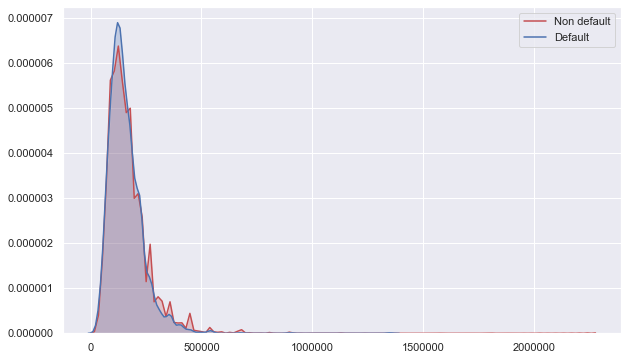

In [29]:
kde_plot('AMT_INCOME_TOTAL')

In [30]:
#check income outlier
application['AMT_INCOME_TOTAL'].describe()
application.nlargest(5, 'AMT_INCOME_TOTAL')

count    3.075100e+04
mean     1.684888e+05
std      9.650195e+04
min      2.700000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      2.250000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
201855,333985,0,Cash loans,F,Y,N,0,2250000.0,1542645.0,62829.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
176312,304300,0,Cash loans,F,Y,Y,0,2025000.0,1288350.0,41692.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
78768,191316,0,Revolving loans,M,Y,N,0,1800000.0,855000.0,42750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
157415,282469,0,Cash loans,F,N,Y,1,1800000.0,760122.0,22356.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
294141,440768,0,Revolving loans,M,N,Y,0,1800000.0,900000.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0


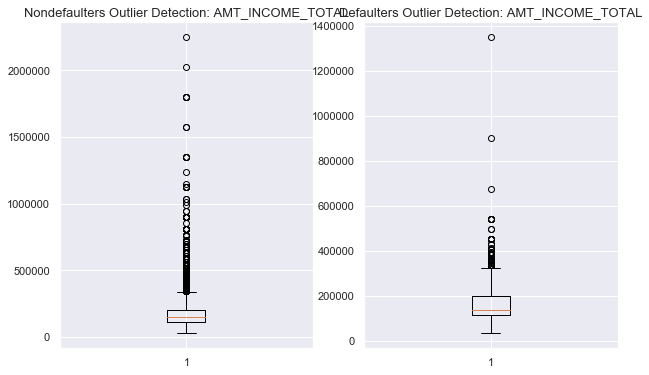

In [31]:
#plt.boxplot(application_tr[application_tr["TARGET"]==0].AMT_INCOME_TOTAL)
boxplot_outlier("AMT_INCOME_TOTAL")

#### Days Employed 

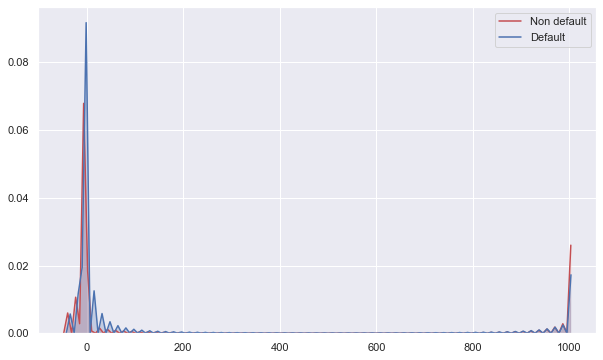

In [32]:
kde_plot("DAYS_EMPLOYED")
#boxplot_outlier("DAYS_EMPLOYED")

### 4) Property: Car/ House/ Flat

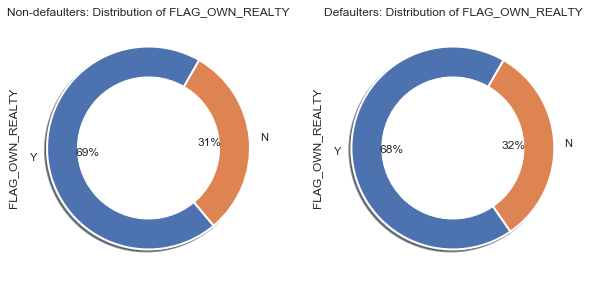

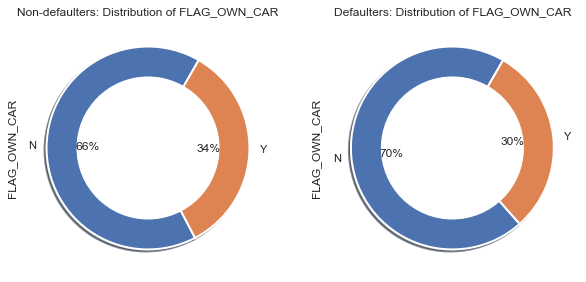

In [33]:
#compare between defaulters and nondefaulters in terms of owning car/house/flat
donut_compare("FLAG_OWN_REALTY")
donut_compare("FLAG_OWN_CAR")

### 5) Living region

Text(0.5, 1.0, 'REGION_POPULATION_RELATIVE distribution')

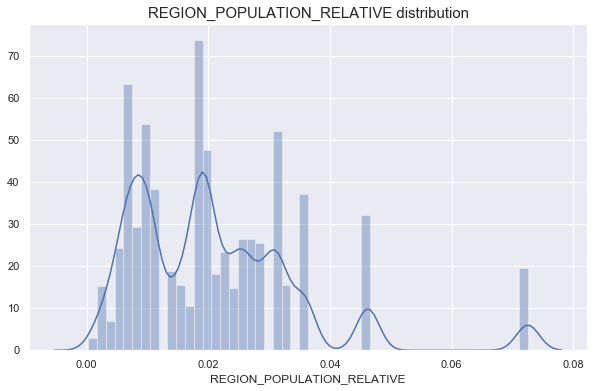

In [34]:
#plot the distribution of normalized population of region
sns.distplot(application["REGION_POPULATION_RELATIVE"])
plt.title("REGION_POPULATION_RELATIVE distribution",fontsize=15)

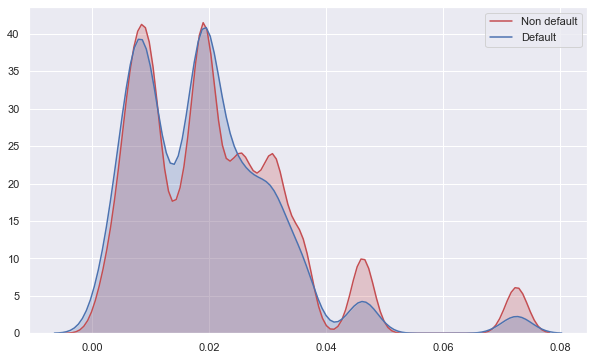

In [35]:
#comparison of defaulters and non-defaulters
kde_plot("REGION_POPULATION_RELATIVE")

### 3.3 Loan based features

#### 1) loan type

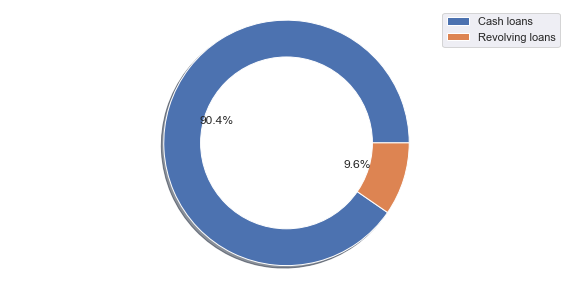

<Figure size 720x432 with 0 Axes>

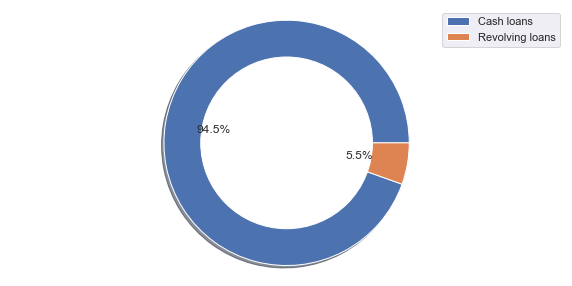

<Figure size 720x432 with 0 Axes>

In [36]:
#check the loan type distribution by default outcome
donut_DefaultOrNot('NAME_CONTRACT_TYPE',0)
donut_DefaultOrNot('NAME_CONTRACT_TYPE',1)

#### 2) Credit amount

Text(0.5, 1.0, 'Amount of Credit')

Text(0.5, 0, 'Credit Amount')

Text(0, 0.5, 'Density')

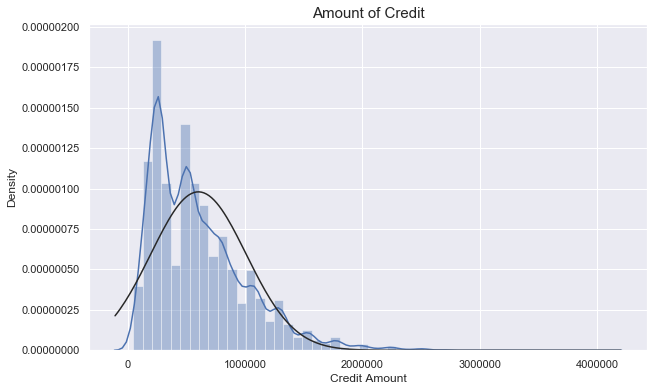

In [37]:
#plot the distribution of credit amount
sns.distplot(application["AMT_CREDIT"],fit=stats.norm)
plt.title('Amount of Credit',fontsize=15); plt.xlabel('Credit Amount',fontsize=12); plt.ylabel('Density',fontsize=12)

In [173]:
#application["AMT_CREDIT"].mean()

In [38]:
#boxplot_outlier("AMT_CREDIT")

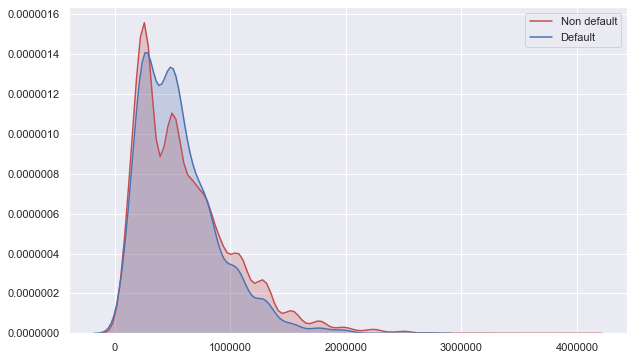

In [39]:
kde_plot("AMT_CREDIT")

Text(0.5, 0, 'AMT_ANNUITY')

Text(0, 0.5, 'AMT_CREDIT')

Text(0.5, 1.0, 'Scatter plot between credit amount and annuity amount')

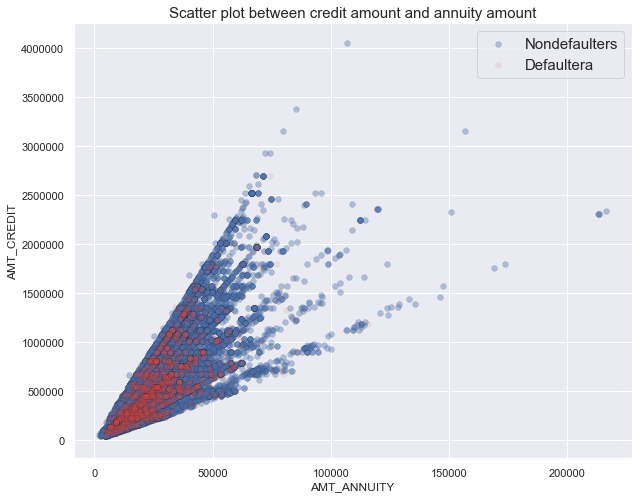

In [40]:
#plot scatter plots for credit amount and annuity amount 
fig = plt.figure(figsize=(10,8))

plt.scatter(application[application["TARGET"]==0]['AMT_ANNUITY'],
            application[application["TARGET"]==0]['AMT_CREDIT'],s=35,
            color="b",alpha=.4,label="Nondefaulters",linewidth=0.2,edgecolor="k")

plt.scatter(application[application["TARGET"]==1]['AMT_ANNUITY'],
            application[application["TARGET"]==1]['AMT_CREDIT'],s=35,
            color="r",alpha=.1,label="Defaultera",linewidth=0.2,edgecolor="k")

plt.legend(loc="best",prop={"size":15});plt.xlabel("AMT_ANNUITY");plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount",fontsize=15)
plt.show()

#### 3)  Amount of Annuity

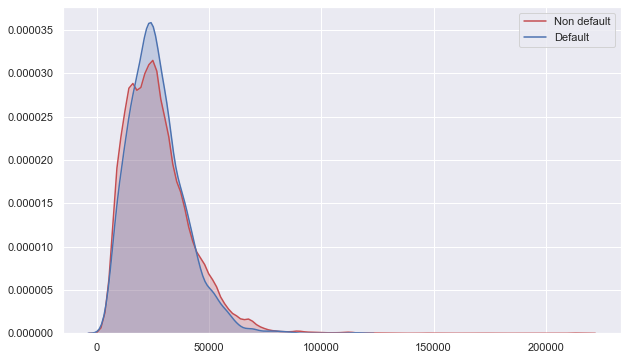

In [41]:
kde_plot("AMT_ANNUITY")

#### 4) Amount of goods price

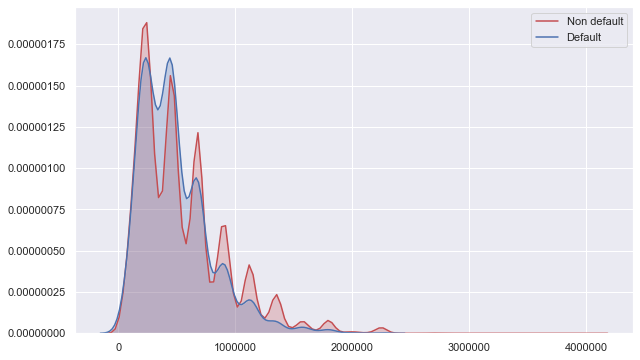

In [42]:
kde_plot("AMT_GOODS_PRICE")

#### 5) other behavior feature

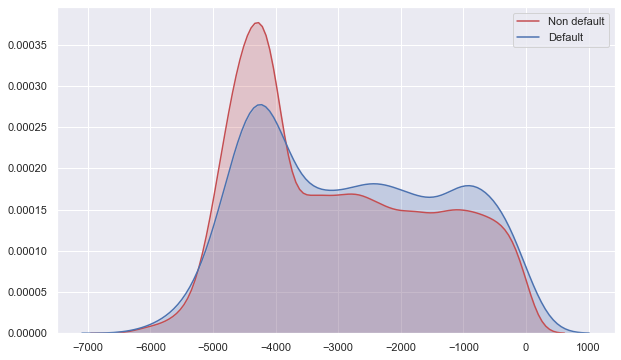

In [43]:
#plot number of days before the application did client change the identity document for applying loans
kde_plot("DAYS_ID_PUBLISH")

### External Sources

<Figure size 720x864 with 0 Axes>

Text(0.5, 0, 'EXT_SOURCE_1')

Text(0, 0.5, 'Density')

Text(0.5, 1.0, 'Distribution of EXT_SOURCE_1 by default outcome')

Text(0.5, 0, 'EXT_SOURCE_2')

Text(0, 0.5, 'Density')

Text(0.5, 1.0, 'Distribution of EXT_SOURCE_2 by default outcome')

Text(0.5, 0, 'EXT_SOURCE_3')

Text(0, 0.5, 'Density')

Text(0.5, 1.0, 'Distribution of EXT_SOURCE_3 by default outcome')

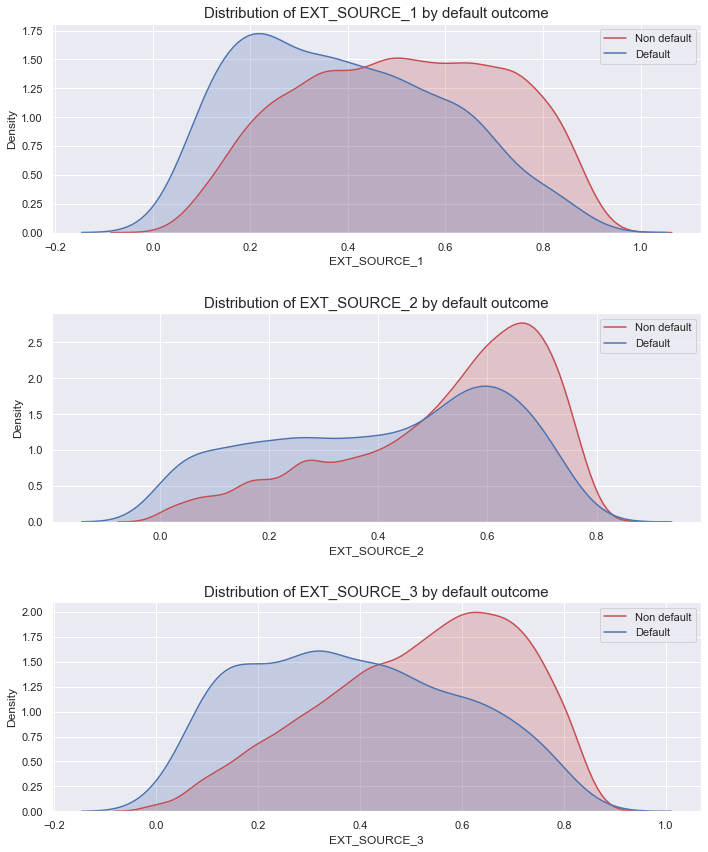

In [44]:
# using for loop plotting the distribution of three external sources by default outcome
plt.figure(figsize = (10, 12))
for i, j in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    kde_plot(j)
    # Add notation
    plt.xlabel('%s' % j);plt.ylabel('Density')
    plt.title('Distribution of %s by default outcome' % j,fontsize=15)
    plt.tight_layout(h_pad = 2.5)

# 4. Feature Engineering and Data Preparation 

## 4.1 Manual feature engineering (domain features)

In [45]:
application['CREDIT_TERM'] = application["AMT_CREDIT"] / application["AMT_ANNUITY"]

application['OVER_CREDIT'] = (application["AMT_CREDIT"] > application["AMT_GOODS_PRICE"]).map({False:0, True:1})

application['NUM_DOCUMENT'] = application.iloc[:, 96:116].sum(axis=1)

application['MONTH_INCOME_BALANCE'] = application["AMT_INCOME_TOTAL"]/4 - application["AMT_ANNUITY"]

application['CREDIT_INCOME_RATIO'] = application['AMT_CREDIT'] / application['AMT_INCOME_TOTAL']

application['EMPLOYED_BIRTH_PERCENT'] = application['DAYS_EMPLOYED'] / application['DAYS_BIRTH']

application['REGISTRATION_ID_RATIO'] = application['DAYS_REGISTRATION'] / application['DAYS_ID_PUBLISH']

In [46]:
#dataset with manually created features
application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_TERM,OVER_CREDIT,NUM_DOCUMENT,MONTH_INCOME_BALANCE,CREDIT_INCOME_RATIO,EMPLOYED_BIRTH_PERCENT,REGISTRATION_ID_RATIO
58296,167580,0,Cash loans,F,N,Y,0,157500.0,1174090.5,49873.5,...,0.0,0.0,3.0,23.541370,1,1,-10498.5,7.454543,-0.226635,0.411341
286459,431774,0,Cash loans,F,N,Y,0,67500.0,227520.0,13189.5,...,0.0,0.0,0.0,17.250085,1,1,3685.5,3.370667,-0.026366,2.391612
81217,194173,0,Cash loans,F,N,Y,0,90000.0,90000.0,9351.0,...,0.0,0.0,3.0,9.624639,0,1,13149.0,1.000000,-0.190646,76.851064
102593,219096,1,Cash loans,M,Y,Y,0,405000.0,640080.0,29970.0,...,0.0,0.0,4.0,21.357357,1,1,71280.0,1.580444,-0.072599,1.033939
38837,144980,0,Cash loans,F,N,Y,0,90000.0,302206.5,16524.0,...,0.0,1.0,0.0,18.288943,1,1,5976.0,3.357850,-0.070878,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272930,416398,1,Cash loans,M,N,N,0,72000.0,417024.0,33565.5,...,NaN,NaN,NaN,12.424186,1,1,-15565.5,5.792000,-0.022114,0.861792
231685,368360,0,Cash loans,F,Y,N,0,135000.0,497520.0,33376.5,...,0.0,0.0,2.0,14.906296,1,1,373.5,3.685333,-0.167480,2.971791
63992,174203,0,Cash loans,F,Y,Y,0,72000.0,269550.0,18364.5,...,0.0,2.0,3.0,14.677775,1,1,-364.5,3.743750,16.486549,0.134628
174889,302668,0,Cash loans,F,N,N,0,54000.0,1078200.0,34911.0,...,0.0,0.0,0.0,30.884249,1,1,-21411.0,19.966667,17.769923,3.466340


## 4.2 Automated feature engineering (featuretools)

In [47]:
#featuretools for automated feature engineering
#!pip install featuretools
import featuretools as ft
# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

### Create entity set

In [48]:
# make entity set with id applications
es = ft.EntitySet(id = 'clients')

# deal with entities with a unique index
es = es.entity_from_dataframe(entity_id = 'app', dataframe = application, index = 'SK_ID_CURR')
es = es.entity_from_dataframe(entity_id = 'bureau', dataframe = bureau, index = 'SK_ID_BUREAU')
es = es.entity_from_dataframe(entity_id = 'previous_app', dataframe = previous_application, index = 'SK_ID_PREV')

# deal with entities that do not have a unique index and specify make_index=True
es = es.entity_from_dataframe(entity_id = 'bureau_balance', dataframe = bureau_balance, 
                              make_index = True, index = 'bb_index')
es = es.entity_from_dataframe(entity_id = 'pos_cash_bal', dataframe = pos_cash_balance, 
                              make_index = True, index = 'pcb_index')
es = es.entity_from_dataframe(entity_id = 'instl_pay', dataframe = installments_payments ,
                              make_index = True, index = 'instl_index')
es = es.entity_from_dataframe(entity_id = 'credit_card_bal', dataframe = credit_card_balance,
                              make_index = True, index = 'cc_index')

In [49]:
#specify all six relationships and then add them to the EntitySet created before

# Relationship between app and bureau
App_Bureau = ft.Relationship(es['app']['SK_ID_CURR'], es['bureau']['SK_ID_CURR'])
# Relationship between bureau and bureau balance
Bureau_Balance = ft.Relationship(es['bureau']['SK_ID_BUREAU'], es['bureau_balance']['SK_ID_BUREAU'])
# Relationship between current app and previous apps
App_Previous = ft.Relationship(es['app']['SK_ID_CURR'], es['previous_app']['SK_ID_CURR'])
# Relationships between previous apps and cash, installments, and credit
Previous_Cash = ft.Relationship(es['previous_app']['SK_ID_PREV'], es['pos_cash_bal']['SK_ID_PREV'])
Previous_Installments = ft.Relationship(es['previous_app']['SK_ID_PREV'], es['instl_pay']['SK_ID_PREV'])
Previous_Credit = ft.Relationship(es['previous_app']['SK_ID_PREV'], es['credit_card_bal']['SK_ID_PREV'])

# Add in the defined relationships
es = es.add_relationships([App_Bureau, Bureau_Balance, App_Previous,
                           Previous_Cash, Previous_Installments, Previous_Credit])
# show the EntitySet
es

Entityset: clients
  Entities:
    app [Rows: 30751, Columns: 129]
    bureau [Rows: 171643, Columns: 17]
    previous_app [Rows: 167021, Columns: 37]
    bureau_balance [Rows: 2729992, Columns: 4]
    pos_cash_bal [Rows: 1000136, Columns: 9]
    instl_pay [Rows: 1360540, Columns: 9]
    credit_card_bal [Rows: 384031, Columns: 24]
  Relationships:
    bureau.SK_ID_CURR -> app.SK_ID_CURR
    bureau_balance.SK_ID_BUREAU -> bureau.SK_ID_BUREAU
    previous_app.SK_ID_CURR -> app.SK_ID_CURR
    pos_cash_bal.SK_ID_PREV -> previous_app.SK_ID_PREV
    instl_pay.SK_ID_PREV -> previous_app.SK_ID_PREV
    credit_card_bal.SK_ID_PREV -> previous_app.SK_ID_PREV

### Feature Primitives

In [50]:
# List the primitives in a dataframe
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100

#show two types of primitives
primitives[primitives['type'] == 'aggregation'].head(20)
primitives[primitives['type'] == 'transform'].head(20)

,name,type,dask_compatible,description
0,mean,aggregation,True,Computes the average for a list of values.
1,percent_true,aggregation,True,Determines the percent of `True` values.
2,last,aggregation,False,Determines the last value in a list.
3,trend,aggregation,False,Calculates the trend of a variable over time.
4,first,aggregation,False,Determines the first value in a list.
5,time_since_last,aggregation,False,Calculates the time elapsed since the last datetime (default in seconds).
6,skew,aggregation,False,Computes the extent to which a distribution differs from a normal distribution.
7,num_true,aggregation,True,Counts the number of `True` values.
8,max,aggregation,True,"Calculates the highest value, ignoring `NaN` values."
9,mode,aggregation,False,Determines the most commonly repeated value.


,name,type,dask_compatible,description
22,greater_than_equal_to_scalar,transform,True,Determines if values are greater than or equal to a given scalar.
23,add_numeric_scalar,transform,True,Add a scalar to each value in the list.
24,cum_max,transform,False,Calculates the cumulative maximum.
25,diff,transform,False,Compute the difference between the value in a list and the
26,or,transform,True,Element-wise logical OR of two lists.
27,day,transform,True,Determines the day of the month from a datetime.
28,modulo_by_feature,transform,True,Return the modulo of a scalar by each element in the list.
29,greater_than_scalar,transform,True,Determines if values are greater than a given scalar.
30,less_than_scalar,transform,True,Determines if values are less than a given scalar.
31,minute,transform,True,Determines the minutes value of a datetime.


### Deep Feature Synthesis

In [51]:
#choose default customize primitives
primitives_agg =  ["sum", "std", "mean", "count"]

In [52]:
#generate feature matrix and feature names for depth 1 
feature_matrix_depth1, feature_names_depth1 = ft.dfs(entityset = es, 
                                                     target_entity = 'app', 
                                                     agg_primitives=primitives_agg, 
                                                     max_depth = 1, features_only=False)

print('%d Total Features for max_depth=1' % len(feature_names_depth1))

223 Total Features for max_depth=1


In [53]:
##generate feature matrix and feature names for depth 2 
feature_matrix_depth2, feature_names_depth2 = ft.dfs(entityset = es, 
                                                     target_entity = 'app', 
                                                     agg_primitives=primitives_agg, 
                                                     max_depth = 2, features_only=False)

print('%d Total Features for max_depth=2' % len(feature_names_depth2))

792 Total Features for max_depth=2


In [54]:
#return the resulting feature set for depth 1
pd.options.display.max_columns = 320
feature_matrix_depth1.head(10)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_TERM,OVER_CREDIT,NUM_DOCUMENT,MONTH_INCOME_BALANCE,CREDIT_INCOME_RATIO,EMPLOYED_BIRTH_PERCENT,REGISTRATION_ID_RATIO,SUM(bureau.AMT_ANNUITY),SUM(bureau.AMT_CREDIT_MAX_OVERDUE),SUM(bureau.AMT_CREDIT_SUM),SUM(bureau.AMT_CREDIT_SUM_DEBT),SUM(bureau.AMT_CREDIT_SUM_LIMIT),SUM(bureau.AMT_CREDIT_SUM_OVERDUE),SUM(bureau.CNT_CREDIT_PROLONG),SUM(bureau.CREDIT_DAY_OVERDUE),SUM(bureau.DAYS_CREDIT),SUM(bureau.DAYS_CREDIT_ENDDATE),SUM(bureau.DAYS_CREDIT_UPDATE),SUM(bureau.DAYS_ENDDATE_FACT),STD(bureau.AMT_ANNUITY),STD(bureau.AMT_CREDIT_MAX_OVERDUE),STD(bureau.AMT_CREDIT_SUM),STD(bureau.AMT_CREDIT_SUM_DEBT),STD(bureau.AMT_CREDIT_SUM_LIMIT),STD(bureau.AMT_CREDIT_SUM_OVERDUE),STD(bureau.CNT_CREDIT_PROLONG),STD(bureau.CREDIT_DAY_OVERDUE),STD(bureau.DAYS_CREDIT),STD(bureau.DAYS_CREDIT_ENDDATE),STD(bureau.DAYS_CREDIT_UPDATE),STD(bureau.DAYS_ENDDATE_FACT),MEAN(bureau.AMT_ANNUITY),MEAN(bureau.AMT_CREDIT_MAX_OVERDUE),MEAN(bureau.AMT_CREDIT_SUM),MEAN(bureau.AMT_CREDIT_SUM_DEBT),MEAN(bureau.AMT_CREDIT_SUM_LIMIT),MEAN(bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(bureau.CNT_CREDIT_PROLONG),MEAN(bureau.CREDIT_DAY_OVERDUE),MEAN(bureau.DAYS_CREDIT),MEAN(bureau.DAYS_CREDIT_ENDDATE),MEAN(bureau.DAYS_CREDIT_UPDATE),MEAN(bureau.DAYS_ENDDATE_FACT),COUNT(bureau),SUM(previous_app.AMT_ANNUITY),SUM(previous_app.AMT_APPLICATION),SUM(previous_app.AMT_CREDIT),SUM(previous_app.AMT_DOWN_PAYMENT),SUM(previous_app.AMT_GOODS_PRICE),SUM(previous_app.CNT_PAYMENT),SUM(previous_app.DAYS_DECISION),SUM(previous_app.DAYS_FIRST_DRAWING),SUM(previous_app.DAYS_FIRST_DUE),SUM(previous_app.DAYS_LAST_DUE),SUM(previous_app.DAYS_LAST_DUE_1ST_VERSION),SUM(previous_app.DAYS_TERMINATION),SUM(previous_app.HOUR_APPR_PROCESS_START),SUM(previous_app.NFLAG_INSURED_ON_APPROVAL),SUM(previous_app.NFLAG_LAST_APPL_IN_DAY),SUM(previous_app.RATE_DOWN_PAYMEN

In [55]:
#reset the index to put back id
df_man_auto = feature_matrix_depth1.reset_index()
df_man_auto.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_TERM,OVER_CREDIT,NUM_DOCUMENT,MONTH_INCOME_BALANCE,CREDIT_INCOME_RATIO,EMPLOYED_BIRTH_PERCENT,REGISTRATION_ID_RATIO,SUM(bureau.AMT_ANNUITY),SUM(bureau.AMT_CREDIT_MAX_OVERDUE),SUM(bureau.AMT_CREDIT_SUM),SUM(bureau.AMT_CREDIT_SUM_DEBT),SUM(bureau.AMT_CREDIT_SUM_LIMIT),SUM(bureau.AMT_CREDIT_SUM_OVERDUE),SUM(bureau.CNT_CREDIT_PROLONG),SUM(bureau.CREDIT_DAY_OVERDUE),SUM(bureau.DAYS_CREDIT),SUM(bureau.DAYS_CREDIT_ENDDATE),SUM(bureau.DAYS_CREDIT_UPDATE),SUM(bureau.DAYS_ENDDATE_FACT),STD(bureau.AMT_ANNUITY),STD(bureau.AMT_CREDIT_MAX_OVERDUE),STD(bureau.AMT_CREDIT_SUM),STD(bureau.AMT_CREDIT_SUM_DEBT),STD(bureau.AMT_CREDIT_SUM_LIMIT),STD(bureau.AMT_CREDIT_SUM_OVERDUE),STD(bureau.CNT_CREDIT_PROLONG),STD(bureau.CREDIT_DAY_OVERDUE),STD(bureau.DAYS_CREDIT),STD(bureau.DAYS_CREDIT_ENDDATE),STD(bureau.DAYS_CREDIT_UPDATE),STD(bureau.DAYS_ENDDATE_FACT),MEAN(bureau.AMT_ANNUITY),MEAN(bureau.AMT_CREDIT_MAX_OVERDUE),MEAN(bureau.AMT_CREDIT_SUM),MEAN(bureau.AMT_CREDIT_SUM_DEBT),MEAN(bureau.AMT_CREDIT_SUM_LIMIT),MEAN(bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(bureau.CNT_CREDIT_PROLONG),MEAN(bureau.CREDIT_DAY_OVERDUE),MEAN(bureau.DAYS_CREDIT),MEAN(bureau.DAYS_CREDIT_ENDDATE),MEAN(bureau.DAYS_CREDIT_UPDATE),MEAN(bureau.DAYS_ENDDATE_FACT),COUNT(bureau),SUM(previous_app.AMT_ANNUITY),SUM(previous_app.AMT_APPLICATION),SUM(previous_app.AMT_CREDIT),SUM(previous_app.AMT_DOWN_PAYMENT),SUM(previous_app.AMT_GOODS_PRICE),SUM(previous_app.CNT_PAYMENT),SUM(previous_app.DAYS_DECISION),SUM(previous_app.DAYS_FIRST_DRAWING),SUM(previous_app.DAYS_FIRST_DUE),SUM(previous_app.DAYS_LAST_DUE),SUM(previous_app.DAYS_LAST_DUE_1ST_VERSION),SUM(previous_app.DAYS_TERMINATION),SUM(previous_app.HOUR_APPR_PROCESS_START),SUM(previous_app.NFLAG_INSURED_ON_APPROVAL),SUM(previous_app.NFLAG_LAST_APPL_IN_DAY),SUM(previous_app.RATE_

In [56]:
df_man_auto.shape

(30751, 224)

# Preprocessing 

### Dealing with categorical variables

In [57]:
#one hot encoding the categorical variables
df = pd.get_dummies(df_man_auto)
print('Final Data Shape: ', df.shape)

Final Data Shape:  (30751, 345)


In [58]:
#check the unique value of the categorical variable in the original dataset 
application.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Correlation Check and deal with multicollinearity

#### Correlations of original dataset

In [59]:
# correlations of the original datset

df_app_cor=application_sampled.corr()["TARGET"].sort_values().reset_index().dropna()

#create lists of negative and positive correlations (choose top 10)
neg_cor_10=df_app_cor.iloc[:10,:].values.tolist()
pos_cor_10=df_app_cor.iloc[-10:,:].values.tolist()

neg_cor_col=["TARGET"]
for i in neg_cor_10:
    neg_cor_col.append(i[0])
    
pos_cor_col=[]
for i in pos_cor_10:
    pos_cor_col.append(i[0])
    
neg_cor_col
pos_cor_col

['TARGET',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'DAYS_EMPLOYED']

['REG_CITY_NOT_WORK_CITY',
 'FLAG_EMP_PHONE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_3',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'DAYS_BIRTH',
 'TARGET']

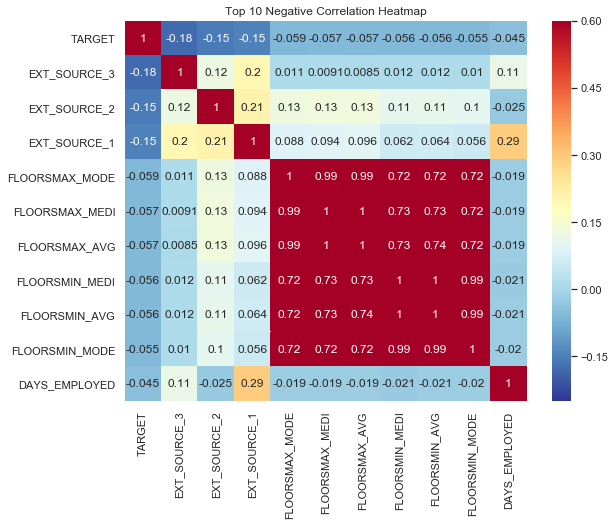

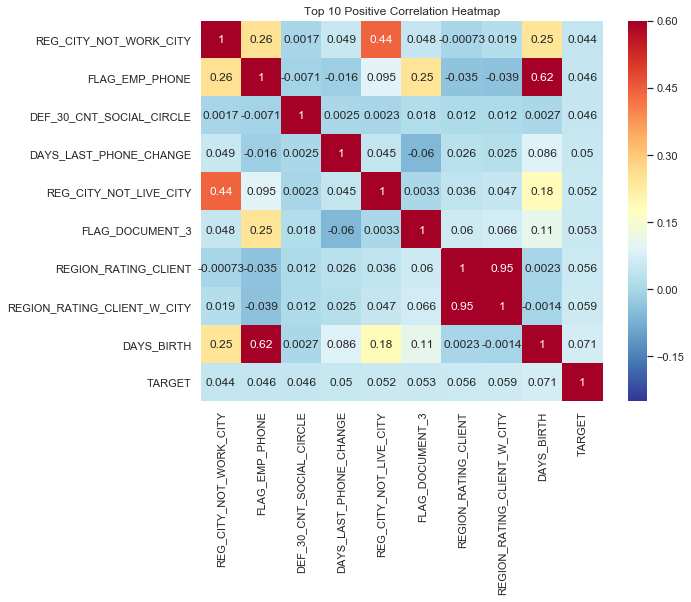

In [60]:
#plot top 10 negative and positive correlations before feature engineering
plt.figure(figsize = (9, 7))
sns.heatmap(application_sampled[neg_cor_col].corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Top 10 Negative Correlation Heatmap');

plt.figure(figsize = (9, 7))
sns.heatmap(application_sampled[pos_cor_col].corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Top 10 Positive Correlation Heatmap');

In [61]:
#top 20 correlations with target variable sorted by the absolute value
corr_abs_sorted=df_app_cor.iloc[df_app_cor.TARGET.abs().argsort()[::-1]]
corr_abs_sorted.head(20)

,index,TARGET
103,TARGET,1.000000
0,EXT_SOURCE_3,-0.178641
1,EXT_SOURCE_2,-0.153857
2,EXT_SOURCE_1,-0.146434
102,DAYS_BIRTH,0.071170
101,REGION_RATING_CLIENT_W_CITY,0.059381
3,FLOORSMAX_MODE,-0.058862
4,FLOORSMAX_MEDI,-0.056986
5,FLOORSMAX_AVG,-0.056833
100,REGION_RATING_CLIENT,0.056105


#### Correlations of final dataset (domain features+automatically generated features)

In [62]:
#negative and positive correlations of features with the target variable after feature engineering
corr_fg_target=df.corr()['TARGET'].sort_values().reset_index().dropna()
corr_fg_target.head(10)
corr_fg_target.tail(10)

,index,TARGET
0,EXT_SOURCE_3,-0.178641
1,EXT_SOURCE_2,-0.153857
2,EXT_SOURCE_1,-0.146434
3,DAYS_BIRTH,-0.071170
4,STD(previous_app.DAYS_DECISION),-0.065523
5,NAME_EDUCATION_TYPE_Higher education,-0.064188
6,FLOORSMAX_MODE,-0.058862
7,STD(previous_app.AMT_DOWN_PAYMENT),-0.057977
8,FLOORSMAX_MEDI,-0.056986
9,FLOORSMAX_AVG,-0.056833


,index,TARGET
331,FLAG_DOCUMENT_3,0.053414
332,REGION_RATING_CLIENT,0.056105
333,NAME_EDUCATION_TYPE_Secondary / secondary special,0.056642
334,MEAN(bureau.DAYS_CREDIT),0.057169
335,STD(bureau.AMT_CREDIT_SUM_OVERDUE),0.057487
336,MEAN(bureau.AMT_CREDIT_SUM_OVERDUE),0.058157
337,REGION_RATING_CLIENT_W_CITY,0.059381
338,STD(previous_app.CNT_PAYMENT),0.076439
339,MEAN(previous_app.RATE_INTEREST_PRIMARY),0.220340
340,TARGET,1.000000


In [63]:
#correlations by absolute value after feature engineering 
corr_fg_abs_sorted=corr_fg_target.iloc[corr_fg_target.TARGET.abs().argsort()[::-1]]
corr_fg_abs_sorted.head(30)

,index,TARGET
340,TARGET,1.000000
339,MEAN(previous_app.RATE_INTEREST_PRIMARY),0.220340
0,EXT_SOURCE_3,-0.178641
1,EXT_SOURCE_2,-0.153857
2,EXT_SOURCE_1,-0.146434
338,STD(previous_app.CNT_PAYMENT),0.076439
3,DAYS_BIRTH,-0.071170
4,STD(previous_app.DAYS_DECISION),-0.065523
5,NAME_EDUCATION_TYPE_Higher education,-0.064188
337,REGION_RATING_CLIENT_W_CITY,0.059381


### Remove highly correlated features

In [64]:
#get the correlation matrix
corr_fts_matrix=df.corr()

#set threshold at 90%
threshold = 0.9
all_fts=corr_fts_matrix.index.tolist()
correlated_pairs = {}

# Iterate through the columns
for fts in all_fts:
    
    above_threshold_fts = [x for x in list(corr_fts_matrix.index[corr_fts_matrix[fts]> threshold])if x != fts]
    correlated_pairs[fts] = above_threshold_fts    


In [65]:
correlated_pairs

{'SK_ID_CURR': [],
 'TARGET': [],
 'CNT_CHILDREN': [],
 'AMT_INCOME_TOTAL': [],
 'AMT_CREDIT': ['AMT_GOODS_PRICE'],
 'AMT_ANNUITY': [],
 'AMT_GOODS_PRICE': ['AMT_CREDIT'],
 'REGION_POPULATION_RELATIVE': [],
 'DAYS_BIRTH': [],
 'DAYS_EMPLOYED': ['EMPLOYED_BIRTH_PERCENT',
  'NAME_INCOME_TYPE_Pensioner',
  'ORGANIZATION_TYPE_XNA'],
 'DAYS_REGISTRATION': [],
 'DAYS_ID_PUBLISH': [],
 'OWN_CAR_AGE': [],
 'FLAG_MOBIL': [],
 'FLAG_EMP_PHONE': [],
 'FLAG_WORK_PHONE': [],
 'FLAG_CONT_MOBILE': [],
 'FLAG_PHONE': [],
 'FLAG_EMAIL': [],
 'CNT_FAM_MEMBERS': [],
 'REGION_RATING_CLIENT': ['REGION_RATING_CLIENT_W_CITY'],
 'REGION_RATING_CLIENT_W_CITY': ['REGION_RATING_CLIENT'],
 'HOUR_APPR_PROCESS_START': [],
 'REG_REGION_NOT_LIVE_REGION': [],
 'REG_REGION_NOT_WORK_REGION': [],
 'LIVE_REGION_NOT_WORK_REGION': [],
 'REG_CITY_NOT_LIVE_CITY': [],
 'REG_CITY_NOT_WORK_CITY': [],
 'LIVE_CITY_NOT_WORK_CITY': [],
 'EXT_SOURCE_1': [],
 'EXT_SOURCE_2': [],
 'EXT_SOURCE_3': [],
 'APARTMENTS_AVG': ['LIVINGAPARTMEN

In [66]:
#drop correlated_pairs to deal with multicollinearity
up_corr=corr_fts_matrix.where(np.triu(np.ones(corr_fts_matrix.shape),k=1).astype(np.bool))
drop_corr_fts = [column for column in up_corr.columns if any(abs(up_corr[column]) > 0.9)]

df = df.drop(drop_corr_fts, axis=1)


These variables all have a 0.99 correlation with each other which is nearly perfectly positively linear. Including them all in the model is unnecessary because it would be encoding redundant information. We would probably want to remove some of these highly correlated variables in order to help the model learn and generalize better.

### Deal with missing values

#### Remove columns with over 40% of missing values

In [67]:
#Define a function to calculate missing values 

def MisVal_table(data):
    # Total missing values and percentage of missing values
    mis_values = data.isnull().sum()
    pct_mis_values = 100 * data.isnull().sum() / len(data)
        
    # Create a table combing the results and rename the columns
    table_misv = pd.concat([mis_values, pct_mis_values], axis=1)
    table_misv_final = table_misv.rename(columns = {0 : 'Num of Missing Values', 1 : 'Percentage of Total Values'})
        
    # Sort the table by percentage of missing value in descending order
    table_misv_final = table_misv_final[table_misv_final.iloc[:,1] != 0].sort_values(
        'Percentage of Total Values', ascending=False).round(1)
        
    # Print out summary information and return the final result
    print ('This dataframe has ' +str(data.shape[1]) + " columns in total with " 
           + str(table_misv_final.shape[0]) + " columns having missing values.")
    
    return table_misv_final

In [68]:
#return number and percentage of missing values of features in df
df_miss=MisVal_table(df)
df_miss

This dataframe has 262 columns in total with 56 columns having missing values.


,Num of Missing Values,Percentage of Total Values
STD(previous_app.RATE_INTEREST_PRIVILEGED),30751,100.0
STD(previous_app.RATE_INTEREST_PRIMARY),30751,100.0
STD(bureau.AMT_ANNUITY),30138,98.0
STD(previous_app.AMT_DOWN_PAYMENT),30033,97.7
STD(previous_app.RATE_DOWN_PAYMENT),30033,97.7
STD(previous_app.DAYS_TERMINATION),29688,96.5
STD(previous_app.DAYS_FIRST_DRAWING),29688,96.5
STD(previous_app.NFLAG_INSURED_ON_APPROVAL),29688,96.5
STD(previous_app.DAYS_LAST_DUE),29688,96.5
STD(bureau.DAYS_ENDDATE_FACT),29151,94.8


In [69]:
#return number and percentage of missing values of features in the original dataset(before feature engineering)
MisVal_table(application_sampled)

This dataframe has 122 columns in total with 65 columns having missing values.


,Num of Missing Values,Percentage of Total Values
COMMONAREA_MEDI,21456,69.8
COMMONAREA_MODE,21456,69.8
COMMONAREA_AVG,21456,69.8
NONLIVINGAPARTMENTS_MEDI,21294,69.2
NONLIVINGAPARTMENTS_MODE,21294,69.2
...,...,...
DEF_30_CNT_SOCIAL_CIRCLE,99,0.3
OBS_30_CNT_SOCIAL_CIRCLE,99,0.3
EXT_SOURCE_2,66,0.2
AMT_GOODS_PRICE,31,0.1


In [70]:
#get columns with over 40% of missing values 
miss_fts=list(df_miss[df_miss["Percentage of Total Values"]>40].index)
len(miss_fts)
miss_fts

42

['STD(previous_app.RATE_INTEREST_PRIVILEGED)',
 'STD(previous_app.RATE_INTEREST_PRIMARY)',
 'STD(bureau.AMT_ANNUITY)',
 'STD(previous_app.AMT_DOWN_PAYMENT)',
 'STD(previous_app.RATE_DOWN_PAYMENT)',
 'STD(previous_app.DAYS_TERMINATION)',
 'STD(previous_app.DAYS_FIRST_DRAWING)',
 'STD(previous_app.NFLAG_INSURED_ON_APPROVAL)',
 'STD(previous_app.DAYS_LAST_DUE)',
 'STD(bureau.DAYS_ENDDATE_FACT)',
 'STD(previous_app.AMT_ANNUITY)',
 'STD(previous_app.CNT_PAYMENT)',
 'STD(previous_app.AMT_APPLICATION)',
 'STD(previous_app.DAYS_DECISION)',
 'STD(previous_app.HOUR_APPR_PROCESS_START)',
 'STD(previous_app.NFLAG_LAST_APPL_IN_DAY)',
 'STD(previous_app.SELLERPLACE_AREA)',
 'STD(bureau.DAYS_CREDIT_ENDDATE)',
 'STD(bureau.DAYS_CREDIT)',
 'STD(bureau.DAYS_CREDIT_UPDATE)',
 'MEAN(bureau.DAYS_ENDDATE_FACT)',
 'MEAN(previous_app.AMT_ANNUITY)',
 'MEAN(previous_app.CNT_PAYMENT)',
 'COMMONAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'FLOORSMIN_AVG',
 'MEAN(previous_app.AMT_APPLICATION)',
 'MEAN(previous_app.DAYS

In [71]:
##remove columns with over 40% of missing values 
df_miss_removed=df.drop(miss_fts,axis=1)
df_miss_removed

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_TERM,OVER_CREDIT,NUM_DOCUMENT,MONTH_INCOME_BALANCE,CREDIT_INCOME_RATIO,REGISTRATION_ID_RATIO,SUM(bureau.AMT_ANNUITY),SUM(bureau.AMT_CREDIT_MAX_OVERDUE),SUM(bureau.AMT_CREDIT_SUM),SUM(bureau.AMT_CREDIT_SUM_DEBT),SUM(bureau.AMT_CREDIT_SUM_LIMIT),SUM(bureau.AMT_CREDIT_SUM_OVERDUE),SUM(bureau.CNT_CREDIT_PROLONG),SUM(bureau.CREDIT_DAY_OVERDUE),SUM(bureau.DAYS_CREDIT),SUM(bureau.DAYS_CREDIT_ENDDATE),SUM(bureau.DAYS_CREDIT_UPDATE),COUNT(bureau),SUM(previous_app.AMT_ANNUITY),SUM(previous_app.AMT_APPLICATION),SUM(previous_app.AMT_DOWN_PAYMENT),SUM(previous_app.CNT_PAYMENT),SUM(previous_app.DAYS_DECISION),SUM(previous_app.DAYS_FIRST_DRAWING),SUM(previous_app.DAYS_FIRST_DUE),SUM(previous_app.DAYS_LAST_DUE),SUM(previous_app.DAYS_LAST_DUE_1ST_VERSION),SUM(previous_app.HOUR_APPR_PROCESS_START),SUM(previous_app.NFLAG_INSURED_ON_APPROVAL),SUM(previous_app.RATE_DOWN_PAYMENT),SUM(previous_app.RATE_INTEREST_PRIMARY),SUM(previous_app.RATE_INTEREST_PRIVILEGED),SUM(previous_app.SELLERPLACE_AREA),NAME_CONTRACT_TYPE_Cash loans,CODE_GENDER_F,FLAG_OWN_CAR_N,FLAG_OWN_REALTY_N,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2

###  impute other columns 

In [72]:
df_miss_removed.dtypes.value_counts()

uint8      130
float64     51
int64       39
dtype: int64

In [73]:
# Convert all columns to numeric
for i in df_miss_removed.columns:
    df_miss_removed[i] = df_miss_removed[i].astype(float)
#check null value 
df_miss_removed.dtypes.value_counts()
df_miss_removed.isnull().values.any()

float64    220
dtype: int64

True

In [74]:
# impute other columns with median
from sklearn.preprocessing import Imputer
imputer  = Imputer(missing_values=np.nan, strategy='median', axis=1)

imputed_data = pd.DataFrame(imputer.fit_transform(df_miss_removed))
imputed_data.columns = df_miss_removed.columns
imputed_data.index = df_miss_removed.index
imputed_data

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_TERM,OVER_CREDIT,NUM_DOCUMENT,MONTH_INCOME_BALANCE,CREDIT_INCOME_RATIO,REGISTRATION_ID_RATIO,SUM(bureau.AMT_ANNUITY),SUM(bureau.AMT_CREDIT_MAX_OVERDUE),SUM(bureau.AMT_CREDIT_SUM),SUM(bureau.AMT_CREDIT_SUM_DEBT),SUM(bureau.AMT_CREDIT_SUM_LIMIT),SUM(bureau.AMT_CREDIT_SUM_OVERDUE),SUM(bureau.CNT_CREDIT_PROLONG),SUM(bureau.CREDIT_DAY_OVERDUE),SUM(bureau.DAYS_CREDIT),SUM(bureau.DAYS_CREDIT_ENDDATE),SUM(bureau.DAYS_CREDIT_UPDATE),COUNT(bureau),SUM(previous_app.AMT_ANNUITY),SUM(previous_app.AMT_APPLICATION),SUM(previous_app.AMT_DOWN_PAYMENT),SUM(previous_app.CNT_PAYMENT),SUM(previous_app.DAYS_DECISION),SUM(previous_app.DAYS_FIRST_DRAWING),SUM(previous_app.DAYS_FIRST_DUE),SUM(previous_app.DAYS_LAST_DUE),SUM(previous_app.DAYS_LAST_DUE_1ST_VERSION),SUM(previous_app.HOUR_APPR_PROCESS_START),SUM(previous_app.NFLAG_INSURED_ON_APPROVAL),SUM(previous_app.RATE_DOWN_PAYMENT),SUM(previous_app.RATE_INTEREST_PRIMARY),SUM(previous_app.RATE_INTEREST_PRIVILEGED),SUM(previous_app.SELLERPLACE_AREA),NAME_CONTRACT_TYPE_Cash loans,CODE_GENDER_F,FLAG_OWN_CAR_N,FLAG_OWN_REALTY_N,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2

In [75]:
# in case there is infinity adnd fill the rest of null values with 0
imputed_final=pd.DataFrame(np.nan_to_num(imputed_data))
imputed_final.columns = df_miss_removed.columns
imputed_final.index = df_miss_removed.index
imputed_final

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_TERM,OVER_CREDIT,NUM_DOCUMENT,MONTH_INCOME_BALANCE,CREDIT_INCOME_RATIO,REGISTRATION_ID_RATIO,SUM(bureau.AMT_ANNUITY),SUM(bureau.AMT_CREDIT_MAX_OVERDUE),SUM(bureau.AMT_CREDIT_SUM),SUM(bureau.AMT_CREDIT_SUM_DEBT),SUM(bureau.AMT_CREDIT_SUM_LIMIT),SUM(bureau.AMT_CREDIT_SUM_OVERDUE),SUM(bureau.CNT_CREDIT_PROLONG),SUM(bureau.CREDIT_DAY_OVERDUE),SUM(bureau.DAYS_CREDIT),SUM(bureau.DAYS_CREDIT_ENDDATE),SUM(bureau.DAYS_CREDIT_UPDATE),COUNT(bureau),SUM(previous_app.AMT_ANNUITY),SUM(previous_app.AMT_APPLICATION),SUM(previous_app.AMT_DOWN_PAYMENT),SUM(previous_app.CNT_PAYMENT),SUM(previous_app.DAYS_DECISION),SUM(previous_app.DAYS_FIRST_DRAWING),SUM(previous_app.DAYS_FIRST_DUE),SUM(previous_app.DAYS_LAST_DUE),SUM(previous_app.DAYS_LAST_DUE_1ST_VERSION),SUM(previous_app.HOUR_APPR_PROCESS_START),SUM(previous_app.NFLAG_INSURED_ON_APPROVAL),SUM(previous_app.RATE_DOWN_PAYMENT),SUM(previous_app.RATE_INTEREST_PRIMARY),SUM(previous_app.RATE_INTEREST_PRIVILEGED),SUM(previous_app.SELLERPLACE_AREA),NAME_CONTRACT_TYPE_Cash loans,CODE_GENDER_F,FLAG_OWN_CAR_N,FLAG_OWN_REALTY_N,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2

In [76]:
#final_data.isinf().values.any()
#np.isinf(imputed_final).any().value_counts()

## Initial feature selection using 3 methods

In [77]:
#get features names and seperate all independent variables and the target variable
imputed_final_copy=imputed_final.copy()
x=imputed_final_copy.drop(["SK_ID_CURR","TARGET"],axis=1)
y=imputed_final_copy["TARGET"]
fts_name=x.columns.tolist()

### 1) filter : chi-2 (SelectKBest)

In [78]:
# filter method by calling sklearn function SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

#need to normalize features before select
x_norm=MinMaxScaler().fit_transform(x)
chi_selector=SelectKBest(chi2,k=100)
#fit chi_selector 
chi_selector.fit(x_norm,y)
#show if certain features are selected 
chi_support=chi_selector.get_support()
#get the 100 features selected by chi selector
chi_feature=x.loc[:,chi_support].columns.tolist()

SelectKBest(k=100, score_func=<function chi2 at 0x1a1b3ef730>)

### 2) wrapper: RFE

In [79]:
#using wrapper method (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#fit rfe selector and specify the selecting steps(10 features each)
rfe_selector=RFE(estimator=LogisticRegression(),n_features_to_select=100,step=10,verbose=5)
rfe_selector.fit(x_norm,y)
#show if certain features are selected 
rfe_support=rfe_selector.get_support()
#get the 100 features selected by rfe
rfe_feature=x.loc[:,rfe_support].columns.tolist()

Fitting estimator with 218 features.
Fitting estimator with 208 features.
Fitting estimator with 198 features.
Fitting estimator with 188 features.
Fitting estimator with 178 features.
Fitting estimator with 168 features.
Fitting estimator with 158 features.
Fitting estimator with 148 features.
Fitting estimator with 138 features.
Fitting estimator with 128 features.
Fitting estimator with 118 features.
Fitting estimator with 108 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=100, step=10, verbose=5)

### 3) select from model

In [80]:
#use random forest to select features
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#fit rf_selector
rf_selector=SelectFromModel(RandomForestClassifier(n_estimators=100))
rf_selector.fit(x_norm,y)
#show if certain features are selected 
rf_support=rf_selector.get_support()
#get the 100 features selected by random forest
rf_feature=x.loc[:,rf_support].columns.tolist()

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

### Decide on the final features of use

In [81]:
# create of dataframe and put all selection together
df_fts_selection= pd.DataFrame({'Feature':fts_name, 'Chi-2':chi_support, 
                                'RFE':rfe_support, 'Random Forest':rf_support})

# count the selected times for each feature
df_fts_selection['Count'] = np.sum(df_fts_selection, axis=1)

# display the top 100
df_fts_selection = df_fts_selection.sort_values(['Count','Feature'] , ascending=False)
df_fts_selection.index = range(1, len(df_fts_selection)+1)
df_fts_selection.head(100)

,Feature,Chi-2,RFE,Random Forest,Count
1,SUM(previous_app.DAYS_LAST_DUE),True,True,True,3
2,SUM(previous_app.CNT_PAYMENT),True,True,True,3
3,REGION_RATING_CLIENT,True,True,True,3
4,ORGANIZATION_TYPE_Business Entity Type 3,True,True,True,3
5,FLAG_OWN_CAR_N,True,True,True,3
...,...,...,...,...,...
96,SUM(bureau.AMT_CREDIT_MAX_OVERDUE),False,True,False,1
97,SUM(bureau.AMT_ANNUITY),False,True,False,1
98,REG_REGION_NOT_WORK_REGION,True,False,False,1
99,REG_REGION_NOT_LIVE_REGION,True,False,False,1


In [140]:
#return the final selected feature set
selected_fts=df_fts_selection.head(100).Feature.tolist()
selected_fts.extend(("SK_ID_CURR","TARGET"))
df_final=imputed_final.filter(selected_fts)
df_final

,SUM(previous_app.DAYS_LAST_DUE),SUM(previous_app.CNT_PAYMENT),REGION_RATING_CLIENT,ORGANIZATION_TYPE_Business Entity Type 3,FLAG_OWN_CAR_N,EXT_SOURCE_3,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,CODE_GENDER_F,CNT_CHILDREN,AMT_CREDIT,WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_Panel,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Block,SUM(previous_app.SELLERPLACE_AREA),SUM(previous_app.HOUR_APPR_PROCESS_START),SUM(previous_app.DAYS_LAST_DUE_1ST_VERSION),SUM(previous_app.DAYS_FIRST_DRAWING),SUM(previous_app.AMT_APPLICATION),SUM(previous_app.AMT_ANNUITY),SUM(bureau.DAYS_CREDIT_UPDATE),SUM(bureau.DAYS_CREDIT),SUM(bureau.AMT_CREDIT_SUM_OVERDUE),REG_CITY_NOT_LIVE_CITY,REGION_POPULATION_RELATIVE,OVER_CREDIT,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Agriculture,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Cleaning staff,NAME_TYPE_SUITE_Other_A,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_Unemployed,NAME_HOUSING_TYPE_Office apartment,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Married,NAME_EDUCATION_TYPE_Higher education,NAME_CONTRACT_TYPE_Cash loans,MONTH_INCOME_BALANCE,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_block of flats,FONDKAPREMONT_MODE_org spec account,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_OWN_REALTY_N,FLAG_DOCUMENT_3,FLAG_DOCUMENT_21,FLAG_DOCUMENT_20,FLAG_DOCUMENT_19,FLAG_DOCUMENT_15,FLAG_DOCUMENT_13,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED,CREDIT_TERM,CREDIT_INCOME_RATIO,COUNT(bureau),CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Others,SUM(previous_app.RATE_INTEREST_PRIVILEGED),SUM(previous_app.RATE_INTEREST_PRIMARY),SUM(previous_app.RATE_DOWN_PAYMENT),SUM(previous_app.DAYS_FIRST_DUE),SUM(previous_app.DAYS_DECISION),SUM(previous_app.AMT_DOWN_PAYMENT),SUM(bureau.DAYS_CREDIT_ENDDATE),SUM(bureau.CREDIT_DAY_OVERDUE),SUM(bureau.CNT_CREDIT_PROLONG),SUM(bureau.AMT_CREDIT_SUM_DEBT),SUM(bureau.AMT_CREDIT_SUM),SUM(bureau.AMT_CREDIT_MAX_OVERDUE),SUM(bureau.AMT_ANNUITY),REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_WORK_CITY,SK_ID_CURR,TARGET
0,0.0,0.0,2.0,0.0,1.0,0.297087,0.440505,0.0,-328.0,39.252055,1.0,0.0,1174090.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-3342.0,-3979.0,0.0,0.0,0.018801,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-10498.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1828.0,-4444.0,-8.895890,23.541370,7.454543,2.0,2.0,3.0,49873.5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-3313.0,0.0,0.0,0.0,394983.00,0.000,0.0,0.0,0.0,0.0,167580.0,0.0
1,0.0,0.0,2.0,0.0,1.0,0.000000,0.328679,0.0,-150.0,42.706849,1.0,0.0,227520.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-3023.0,-5369.0,0.0,0.0,0.019101,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3685.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-9466.0,-3958.0,-1.126027,17.250085,3.370667,2.0,2.0,0.0,13189.5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-3874.0,0.0,0.0,0.0,63090.00,1771.290,0.0,0.0,0.0,0.0,431774.0,0.0
2,0.0,0.0,3.0,1.0,1.0,0.511892,0.171259,0.0,-689.0,45.224658,1.0,0.0,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-28.0,-232.0,0.0,0.0,0.010500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,13149.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.

We have 16 columns, in each of which from 2 to 58 different options of values. In general, machine learning models cannot do anything with such columns (except for some, such as LightGBM or CatBoost). Since we plan to try out different models on dataset, we need to do something about it. There are basically two approaches here:

Label Encoding - categories are assigned numbers 0, 1, 2, and so on, and are written in the same column

One-Hot-encoding - one column is decomposed into several by the number of variants, and in these columns it is noted which variant of this record.

There is a small problem with Label Encoding - it assigns numeric values ​​that have nothing to do with reality. For example, if we are dealing with a numerical value, then the borrower's income of 100,000 is definitely greater and better than the income of 20,000. But can we say that, for example, one city is better than another because one is assigned the value 100 and the other is 200 ?

One-Hot-encoding, on the other hand, is safer, but can produce “extra” columns. For example, if we encode the same gender with One-Hot, we will have two columns, “male and female”, although one would suffice, “Is it a man?”

According to the good for this dataset, it would be necessary to encode the signs with low variability with the help of Label Encoding, and everything else - One-Hot, but to simplify, we will encode everything using One-Hot. On the speed of calculation and the result is almost no effect. The pandas coding process itself is very simple.


In this notebook, we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories. 


The feature importances returned by a tree-based model represent the reduction in impurity from including the feature in the model. While the absolute value of the importances can be difficult to interpret, looking at the relative value of the importances allows us to compare the relevance of features. Although we want to be careful about placing too much value on the feature importances, they can be a useful method for dimensionality reduction and understanding the model.


could use the most important features in order to concentrate on these aspects of a client when evaluating a potential loan.??

### Deal with class imbalance

In [141]:
df_final.TARGET.value_counts()

#downsampling the majority 
default = df_final[df_final.TARGET == 1]
nondefault = df_final[df_final.TARGET == 0].sample(round(len(default)*2))
final_data =pd.concat([default,nondefault])

print(final_data.TARGET.value_counts())

0.0    28284
1.0     2467
Name: TARGET, dtype: int64

0.0    4934
1.0    2467
Name: TARGET, dtype: int64


In [142]:
final_data

,SUM(previous_app.DAYS_LAST_DUE),SUM(previous_app.CNT_PAYMENT),REGION_RATING_CLIENT,ORGANIZATION_TYPE_Business Entity Type 3,FLAG_OWN_CAR_N,EXT_SOURCE_3,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,CODE_GENDER_F,CNT_CHILDREN,AMT_CREDIT,WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_Panel,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Block,SUM(previous_app.SELLERPLACE_AREA),SUM(previous_app.HOUR_APPR_PROCESS_START),SUM(previous_app.DAYS_LAST_DUE_1ST_VERSION),SUM(previous_app.DAYS_FIRST_DRAWING),SUM(previous_app.AMT_APPLICATION),SUM(previous_app.AMT_ANNUITY),SUM(bureau.DAYS_CREDIT_UPDATE),SUM(bureau.DAYS_CREDIT),SUM(bureau.AMT_CREDIT_SUM_OVERDUE),REG_CITY_NOT_LIVE_CITY,REGION_POPULATION_RELATIVE,OVER_CREDIT,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Agriculture,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Cleaning staff,NAME_TYPE_SUITE_Other_A,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_Unemployed,NAME_HOUSING_TYPE_Office apartment,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Married,NAME_EDUCATION_TYPE_Higher education,NAME_CONTRACT_TYPE_Cash loans,MONTH_INCOME_BALANCE,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_block of flats,FONDKAPREMONT_MODE_org spec account,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_OWN_REALTY_N,FLAG_DOCUMENT_3,FLAG_DOCUMENT_21,FLAG_DOCUMENT_20,FLAG_DOCUMENT_19,FLAG_DOCUMENT_15,FLAG_DOCUMENT_13,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED,CREDIT_TERM,CREDIT_INCOME_RATIO,COUNT(bureau),CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Others,SUM(previous_app.RATE_INTEREST_PRIVILEGED),SUM(previous_app.RATE_INTEREST_PRIMARY),SUM(previous_app.RATE_DOWN_PAYMENT),SUM(previous_app.DAYS_FIRST_DUE),SUM(previous_app.DAYS_DECISION),SUM(previous_app.AMT_DOWN_PAYMENT),SUM(bureau.DAYS_CREDIT_ENDDATE),SUM(bureau.CREDIT_DAY_OVERDUE),SUM(bureau.CNT_CREDIT_PROLONG),SUM(bureau.AMT_CREDIT_SUM_DEBT),SUM(bureau.AMT_CREDIT_SUM),SUM(bureau.AMT_CREDIT_MAX_OVERDUE),SUM(bureau.AMT_ANNUITY),REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_WORK_CITY,SK_ID_CURR,TARGET
3,0.0,0.0,3.0,1.0,0.0,0.695622,0.655901,0.0,-727.0,65.060274,0.0,0.0,640080.0,0.0,1.0,0.0,0.0,-1.0,11.0,0.0,0.0,0.0,0.000,-1901.0,-2318.0,0.0,0.0,0.018029,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,71280.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-4783.0,-4626.0,-4.723288,21.357357,1.580444,2.0,2.0,4.0,29970.0,0.0,0.0,0.0,0.0,0.00000,0.0,-302.0,0.0,-1920.0,0.0,0.0,0.00,785906.28,35727.885,0.0,0.0,0.0,0.0,219096.0,1.0
5,0.0,0.0,3.0,0.0,1.0,0.591977,0.079965,0.0,-1458.0,32.156164,1.0,0.0,343800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.0,0.006305,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11970.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-2695.0,-2697.0,-4.531507,21.281337,3.056000,0.0,1.0,3.0,16155.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000,0.0,0.0,0.0,1.0,264645.0,1.0
61,365243.0,0.0,3.0,1.0,1.0,0.000000,0.447403,2.0,-569.0,28.608219,1.0,2.0,225000.0,0.0,1.0,0.0,0.0,0.0,13.0,365243.0,-137.0,270000.0,13500.000,0.0,0.0,0.0,0.0,0.020713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,10350.0,0.0,1.0,0.0,1.0,0.0,1.0,0

In [143]:
####tried using class balance of 50%####
default_2 = df_final[df_final.TARGET == 1]
nondefault_2 = df_final[df_final.TARGET == 0].sample(round(len(default)))
final_data_2 =pd.concat([default_2,nondefault_2])

print(final_data_2.TARGET.value_counts())

0.0    2467
1.0    2467
Name: TARGET, dtype: int64


### Logistic regression

To calculate the logistic regression, we need to take tables with coded categorical features, fill in the missing data and normalize them (lead to values ​​from 0 to 1). All this executes the following code:

We use logistic regression from Scikit-Learn as the first model. Let's take the defol model with one amendment - lower the regularization parameter C to avoid overfitting. The usual syntax is to create a model, train it and predict the probability using predict_proba (we need probability, not 0/1)


The model can now be used for predictions. The prdict_proba method will output an array m x 2, where m is the number of observations, the first column is probability 0, the second is probability 1. We need the second (probability of no return).

In [144]:
y=final_data["TARGET"]
del final_data['TARGET']

In [145]:
####tried using class balance of 50%####
y_2=final_data_2["TARGET"]
del final_data_2['TARGET']

In [146]:
####tried using original class balance ####
y_o=df_final["TARGET"]
del df_final['TARGET']

In [147]:
# Split dataset into train and validation set
from sklearn.model_selection import train_test_split

#set test size at 20% 
X_train, X_test, y_train, y_test = train_test_split(final_data,y,test_size=0.2)

In [148]:
####tried using class balance of 50%####
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(final_data_2,y_2,test_size=0.2)

In [149]:
####tried using original class balance ####
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(df_final,y_o,test_size=0.2)

In [92]:
####tried using class balance of 50%####
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

clf_names = ["DecisionTree","LogisticRegression","RandomForest","KNeighbors","GaussianNB","AdaBoost"]

classifiers = [
    DecisionTreeClassifier(max_depth=5,random_state=1),
    LogisticRegression(random_state=1),
    RandomForestClassifier(max_depth=5,random_state=1),
    KNeighborsClassifier(),
    GaussianNB(),
    AdaBoostClassifier(random_state=1)]

#train each classifier and compute the accuracy score
for name, clf in zip(clf_names, classifiers):
    clf.fit(X_train_2, y_train_2)
    score_2 = round(clf.score(X_test_2, y_test_2),4)
    cv_score_2=round(cross_val_score(clf,final_data_2,y_2,cv=5).mean(),4)
    print("Score: "+name,score_2)
    print("Cross validation score: "+name,cv_score_2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

Score: DecisionTree 0.6231
Cross validation score: DecisionTree 0.6291


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Score: LogisticRegression 0.5684
Cross validation score: LogisticRegression 0.5724


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Score: RandomForest 0.6049
Cross validation score: RandomForest 0.6474


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Score: KNeighbors 0.5157
Cross validation score: KNeighbors 0.5182


GaussianNB(priors=None, var_smoothing=1e-09)

Score: GaussianNB 0.5228
Cross validation score: GaussianNB 0.5063


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

Score: AdaBoost 0.6353
Cross validation score: AdaBoost 0.6565


In [93]:
####tried using original class balance ####

for name, clf in zip(clf_names, classifiers):
    clf.fit(X_train_o, y_train_o)
    score_o = round(clf.score(X_test_o, y_test_o),4)
    cv_score_o=round(cross_val_score(clf,df_final,y_o,cv=5).mean(),4)
    print("Score: "+name,score_o)
    print("Cross validation score: "+name,cv_score_o)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

Score: DecisionTree 0.9138
Cross validation score: DecisionTree 0.9185


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Score: LogisticRegression 0.9148
Cross validation score: LogisticRegression 0.9197


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Score: RandomForest 0.9148
Cross validation score: RandomForest 0.9198


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Score: KNeighbors 0.9117
Cross validation score: KNeighbors 0.9146


GaussianNB(priors=None, var_smoothing=1e-09)

Score: GaussianNB 0.7865
Cross validation score: GaussianNB 0.8355


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

Score: AdaBoost 0.9145
Cross validation score: AdaBoost 0.919


## training models using downsampled data (2:1)

### Model 1: Decision trees

In [150]:
%%time

# Create the model
dt=DecisionTreeClassifier(max_depth=5,random_state=1)
# Train the model
dt.fit(X_train, y_train)
#get the accuracy score and cross validation score
dt_y_pred = dt.predict_proba(X_test)[:, 1]
dt_score=round(dt.score(X_test, y_test),4)
dt_cv_score=round(cross_val_score(dt,final_data,y,cv=5).mean(),4)

print("Score of DecisionTreeClassifier: ",dt_score)
print("Cross Validation Score of DecisionTreeClassifier: ",dt_cv_score)

Score of DecisionTreeClassifier:  0.6935
Cross Validation Score of DecisionTreeClassifier:  0.6818
CPU times: user 444 ms, sys: 21.8 ms, total: 466 ms
Wall time: 483 ms


### Model 2: Logistic regression

In [151]:
%%time

# Create the model
lr = LogisticRegression(random_state=1)
# Train the model
lr.fit(X_train, y_train)

lr_y_pred = lr.predict_proba(X_test)[:, 1]
lr_score=round(lr.score(X_test, y_test),4)
lr_cv_score=round(cross_val_score(lr,final_data,y,cv=5).mean(),4)

print("Score of logistic regression: ",lr_score)
print("Cross Validation Score of logistic regression: ",lr_cv_score)

Score of logistic regression:  0.6685
Cross Validation Score of logistic regression:  0.6675
CPU times: user 2.89 s, sys: 156 ms, total: 3.05 s
Wall time: 2.51 s


###  Model 3: Random forest

Logreg does not perform well, try using an improved model - a random forest. This is a much more powerful model that can build hundreds of trees and produce a far more accurate result. Use 100 trees. The scheme of work with the model is the same, completely standard - classifier loading, training. prediction.

In [152]:
%%time

# create a classifier 
rf= RandomForestClassifier(max_depth=5,random_state=1)

# Training on training data
rf.fit(X_train, y_train)

# Test Data Prediction
rf_y_pred= rf.predict_proba(X_test)[:, 1]
rf_score=round(rf.score(X_test, y_test),4)
rf_cv_score=round(cross_val_score(rf,final_data,y,cv=5).mean(),4)

print("Score of random forest: ",rf_score)
print("Cross Validation Score of random forest: ",rf_cv_score)

Score of random forest:  0.6779
Cross Validation Score of random forest:  0.6759
CPU times: user 509 ms, sys: 28.9 ms, total: 538 ms
Wall time: 455 ms


### Model 4: KNeighbors

In [153]:
%%time

knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

# Test Data Prediction
knn_y_pred= knn.predict_proba(X_test)[:, 1]
knn_score=round(knn.score(X_test, y_test),4)
knn_cv_score=round(cross_val_score(knn,final_data,y,cv=5).mean(),4)

print("Score of KNeighbors: ",knn_score)
print("Cross Validation Score of KNeighbors: ",knn_cv_score)

Score of KNeighbors:  0.6111
Cross Validation Score of KNeighbors:  0.6051
CPU times: user 2.38 s, sys: 38.9 ms, total: 2.42 s
Wall time: 2.63 s


### Model 5: GaussianNB

In [154]:
%%time

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Test Data Prediction
gnb_y_pred= gnb.predict_proba(X_test)[:, 1]
gnb_score=round(gnb.score(X_test, y_test),4)
#gnb_roc_auc_score=roc_auc_score(y_test,gnb_y_pred)
gnb_cv_score=round(cross_val_score(gnb,final_data,y,cv=5).mean(),4)

print("Score of GaussianNB: ",gnb_score)
print("Cross Validation Score of GaussianNB: ",gnb_cv_score)

Score of GaussianNB:  0.6556
Cross Validation Score of GaussianNB:  0.6482
CPU times: user 143 ms, sys: 21.8 ms, total: 164 ms
Wall time: 185 ms


### Model 6: Adaboost

In [155]:
%%time

abc=AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

# Test Data Prediction
abc_y_pred= abc.predict_proba(X_test)[:, 1]
abc_score=round(abc.score(X_test, y_test),4)
abc_cv_score=round(cross_val_score(abc,final_data,y,cv=5).mean(),4)

print("Score of AdaBoostClassifier: ",abc_score)
print("Cross Validation Score of AdaBoostClassifier: ",abc_cv_score)

Score of AdaBoostClassifier:  0.7157
Cross Validation Score of AdaBoostClassifier:  0.7088
CPU times: user 6.52 s, sys: 149 ms, total: 6.67 s
Wall time: 7.8 s


### Score Comparison

In [156]:
#create a dataframe to compare the model performance
model_score=pd.DataFrame({'Models':['DecisionTreeClassifier','LogisticRegression','RandomForest','KNeighbors','GaussianNB','AdaBoost'], 
              'cross_val_score':[dt_score,lr_score,rf_score,knn_score,gnb_score,abc_score], 
              'score':[dt_cv_score,lr_cv_score,rf_cv_score,knn_cv_score,gnb_cv_score,abc_cv_score]})
model_score=model_score.sort_values(['cross_val_score'] , ascending=False)
model_score

,Models,cross_val_score,score
5,AdaBoost,0.7157,0.7088
0,DecisionTreeClassifier,0.6935,0.6818
2,RandomForest,0.6779,0.6759
1,LogisticRegression,0.6685,0.6675
4,GaussianNB,0.6556,0.6482
3,KNeighbors,0.6111,0.6051


## Tuning hyperparameters of the selected model: adaboost

In [157]:
#tune hyperparameters of the selected model using gridsearch method
from sklearn.model_selection import GridSearchCV
#Set up possible values of parameters to optimize over
gird_params={'n_estimators' : range(100,300,10),
             'learning_rate': [0.2,0.4,0.6,0.8]}
abc_clf=GridSearchCV(AdaBoostClassifier(),gird_params)
#fit the best model 
abc=abc_clf.fit(X_train, y_train)
#get the best parameter and score
print(abc_clf.best_params_)
print(abc_clf.best_score_)

y_test_pred=abc_clf.predict(X_test)

{'learning_rate': 0.6, 'n_estimators': 180}
0.7206081081081082


In [158]:
#applied the best parameters to adaboost model
abc_best=AdaBoostClassifier(learning_rate=0.6, n_estimators=180)
abc_best.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.6,
                   n_estimators=180, random_state=None)

# Result Presentation

In [159]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report

# print the confusion matrix
cf_matrix=confusion_matrix(y_test, y_test_pred)
cf_matrix

print(classification_report(y_test, y_test_pred))

array([[851, 142],
       [283, 205]])

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       993
         1.0       0.59      0.42      0.49       488

    accuracy                           0.71      1481
   macro avg       0.67      0.64      0.65      1481
weighted avg       0.70      0.71      0.70      1481



Text(0.5, 1, 'Confusion Matrix')

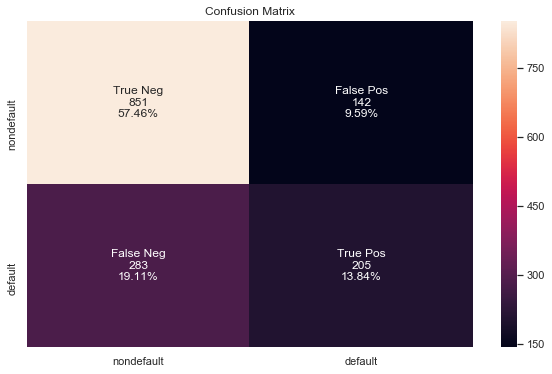

In [160]:
# Plot Confusion Matrix

names = ["True Neg","False Pos","False Neg","True Pos"]
counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = plt.axes()
x_axis_labels = ["nondefault","default"];y_axis_labels = ["nondefault","default"] 

sns.heatmap(cf_matrix, annot=labels, fmt="",ax = ax,
           xticklabels=x_axis_labels, yticklabels=y_axis_labels)

ax.set_title('Confusion Matrix')
plt.show()

(-0.02, 1)

(0, 1.02)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

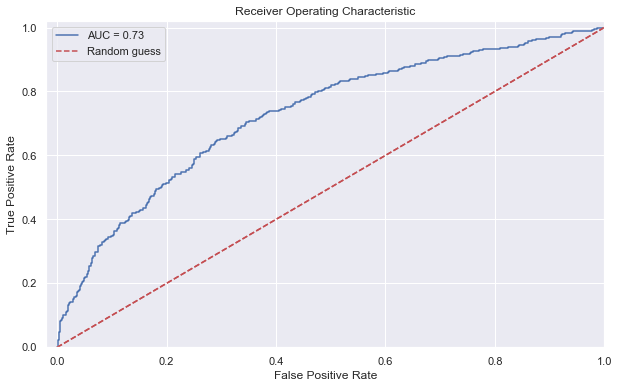

In [170]:
# plot the  ROC curve
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
pred = abc_clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

#add notation and format the plot
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random guess');plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1]);plt.ylim([0, 1.02]);plt.legend()
plt.ylabel('True Positive Rate');plt.xlabel('False Positive Rate');plt.title('Receiver Operating Characteristic')
plt.show()

## Feature selection:  feature importance 

The simplest method for interpreting a model is to look at the importance of attributes (which not all models can do). Since our classifier processed the array, it will take some work to re-set the column names in accordance with the columns of this array.

In [130]:
# Function for calculating the importance of features

def plot_feature_importances(clf):
    rcParams['figure.figsize'] = 10,6
    # prepare feature importance dataframe and sort values
    fts_imp=clf.feature_importances_
    imp_results = pd.DataFrame({'Feature': final_data.columns, 'Importance':fts_imp})
    results_sort = imp_results.sort_values('Importance', ascending = False)
    
    #plot top 20 important features 
    results_sort.head(20).plot(x = 'Feature', y = 'Importance', kind = 'barh')
    #plt.figure(figsize = (15, 10))
    return results_sort 

#funciton to extract features with null importance under each model
def null_importance_features(clf):
    imp= pd.DataFrame({'Feature': final_data.columns, 'Importance':clf.feature_importances_})
    imp_sort = imp.sort_values('Importance', ascending = False)
    nullimp_fts=imp_sort[imp_sort["Importance"]==0].Feature.tolist()
    return nullimp_fts

,Feature,Importance
76,CREDIT_TERM,0.129412
5,EXT_SOURCE_3,0.111765
9,DAYS_BIRTH,0.064706
6,EXT_SOURCE_2,0.052941
81,AMT_ANNUITY,0.035294
...,...,...
65,FLAG_OWN_REALTY_N,0.000000
20,SUM(previous_app.DAYS_FIRST_DRAWING),0.000000
67,FLAG_DOCUMENT_21,0.000000
68,FLAG_DOCUMENT_20,0.000000


Text(0.5, 1.0, 'Feature Importance for adaboost model')

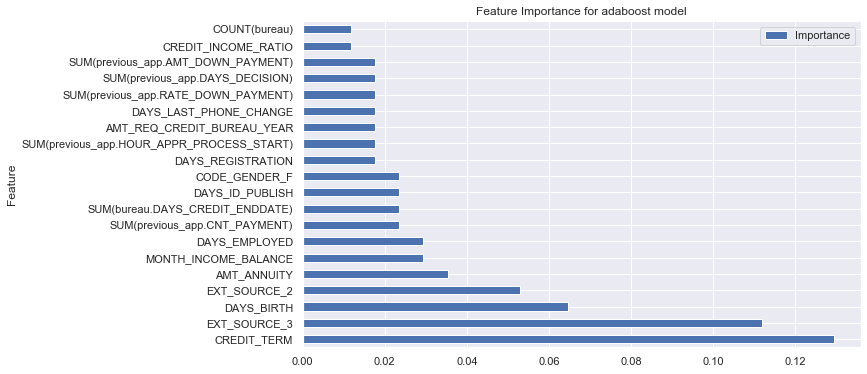

In [131]:
#feature importance for adaboost model
plot_feature_importances(abc_best)
plt.title("Feature Importance for adaboost model")

,Feature,Importance
6,EXT_SOURCE_2,0.234887
5,EXT_SOURCE_3,0.177725
74,DAYS_ID_PUBLISH,0.047031
76,CREDIT_TERM,0.046606
12,AMT_CREDIT,0.046138
...,...,...
69,FLAG_DOCUMENT_19,0.000000
70,FLAG_DOCUMENT_15,0.000000
43,ORGANIZATION_TYPE_Culture,0.000000
34,ORGANIZATION_TYPE_Self-employed,0.000000


Text(0.5, 1.0, 'Feature Importance for random forest model')

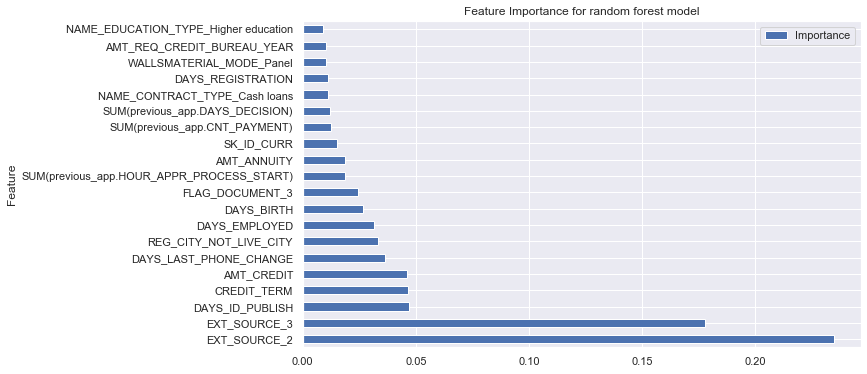

In [132]:
#feature importance for random forest model
plot_feature_importances(rf)
plt.title("Feature Importance for random forest model")

In [133]:
#get null importance features from random forest 
rf_null_fts=null_importance_features(rf)
len(rf_null_fts)
rf_null_fts

38

['WALLSMATERIAL_MODE_Others',
 'SUM(previous_app.RATE_INTEREST_PRIVILEGED)',
 'SUM(bureau.AMT_CREDIT_SUM_OVERDUE)',
 'WALLSMATERIAL_MODE_Block',
 'SUM(previous_app.RATE_INTEREST_PRIMARY)',
 'SUM(previous_app.AMT_DOWN_PAYMENT)',
 'SUM(bureau.DAYS_CREDIT_ENDDATE)',
 'SUM(bureau.CREDIT_DAY_OVERDUE)',
 'SUM(bureau.CNT_CREDIT_PROLONG)',
 'WALLSMATERIAL_MODE_Monolithic',
 'REG_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'ORGANIZATION_TYPE_University',
 'FLAG_DOCUMENT_13',
 'ORGANIZATION_TYPE_Trade: type 7',
 'ORGANIZATION_TYPE_Trade: type 6',
 'ORGANIZATION_TYPE_Cleaning',
 'ORGANIZATION_TYPE_Agriculture',
 'OCCUPATION_TYPE_Waiters/barmen staff',
 'ORGANIZATION_TYPE_Industry: type 5',
 'OCCUPATION_TYPE_IT staff',
 'ORGANIZATION_TYPE_Industry: type 9',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_INCOME_TYPE_Working',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_HOUSING_TYPE_Office apartment',
 'ORGANIZATION_TYPE_Legal Services',
 'ORGANIZATION_TYPE_Police',
 'HOUSETYPE_MODE_terraced house',
 'F

In [134]:
#get null importance features from adaboost
abc_null_fts=null_importance_features(abc_best)
len(abc_null_fts)
abc_null_fts

42

['WALLSMATERIAL_MODE_Stone, brick',
 'SUM(bureau.AMT_CREDIT_SUM)',
 'WALLSMATERIAL_MODE_Others',
 'REG_REGION_NOT_WORK_REGION',
 'CNT_FAM_MEMBERS',
 'REG_REGION_NOT_LIVE_REGION',
 'SUM(previous_app.RATE_INTEREST_PRIMARY)',
 'REG_CITY_NOT_WORK_CITY',
 'WALLSMATERIAL_MODE_Monolithic',
 'WALLSMATERIAL_MODE_Block',
 'SUM(bureau.CREDIT_DAY_OVERDUE)',
 'SUM(previous_app.DAYS_FIRST_DUE)',
 'SUM(bureau.AMT_CREDIT_SUM_OVERDUE)',
 'FLAG_DOCUMENT_15',
 'OCCUPATION_TYPE_Laborers',
 'ORGANIZATION_TYPE_Trade: type 7',
 'ORGANIZATION_TYPE_Trade: type 1',
 'ORGANIZATION_TYPE_Self-employed',
 'ORGANIZATION_TYPE_Police',
 'ORGANIZATION_TYPE_Military',
 'ORGANIZATION_TYPE_Legal Services',
 'ORGANIZATION_TYPE_Industry: type 9',
 'ORGANIZATION_TYPE_Industry: type 4',
 'ORGANIZATION_TYPE_Industry: type 12',
 'ORGANIZATION_TYPE_Cleaning',
 'ORGANIZATION_TYPE_Agriculture',
 'OCCUPATION_TYPE_Security staff',
 'OCCUPATION_TYPE_IT staff',
 'FLAG_DOCUMENT_19',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_INCOME_TYPE_Workin

In [135]:
# remove features which are in both two lists of null importance features
final_null_list=list(set(rf_null_fts) & set(abc_null_fts))
len(final_null_list)
final_null_list

26

['ORGANIZATION_TYPE_Police',
 'ORGANIZATION_TYPE_Agriculture',
 'FLAG_DOCUMENT_15',
 'REG_REGION_NOT_LIVE_REGION',
 'OCCUPATION_TYPE_IT staff',
 'ORGANIZATION_TYPE_Legal Services',
 'ORGANIZATION_TYPE_Self-employed',
 'ORGANIZATION_TYPE_Trade: type 7',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_19',
 'WALLSMATERIAL_MODE_Block',
 'REG_REGION_NOT_WORK_REGION',
 'ORGANIZATION_TYPE_Cleaning',
 'FLAG_PHONE',
 'SUM(previous_app.RATE_INTEREST_PRIMARY)',
 'WALLSMATERIAL_MODE_Monolithic',
 'OCCUPATION_TYPE_Cleaning staff',
 'NAME_TYPE_SUITE_Other_A',
 'SUM(bureau.AMT_CREDIT_SUM_OVERDUE)',
 'WALLSMATERIAL_MODE_Others',
 'NAME_INCOME_TYPE_Working',
 'FLAG_DOCUMENT_21',
 'NAME_INCOME_TYPE_Unemployed',
 'HOUSETYPE_MODE_terraced house',
 'ORGANIZATION_TYPE_Industry: type 9',
 'SUM(bureau.CREDIT_DAY_OVERDUE)']

In [136]:
# test the prediction performance after removing null importance features 

final_data_r =pd.concat([default,nondefault])

data_nullfts_removed=final_data_r.drop(final_null_list, axis=1)

y_r=data_nullfts_removed["TARGET"]
del data_nullfts_removed['TARGET']

#set test size at 20% 
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(data_nullfts_removed,y_r,test_size=0.2)

In [164]:
# test the prediction performance after removing null importance features 
for name, clf in zip(clf_names, classifiers):
    clf.fit(X_train_r, y_train_r)
    score_r = round(clf.score(X_test_r, y_test_r),4)
    cv_score_r=round(cross_val_score(clf,data_nullfts_removed,y_r,cv=5).mean(),4)
    print("Score: "+name,score_r)
    print("Cross validation score: "+name,cv_score_r)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

Score: DecisionTree 0.6752
Cross validation score: DecisionTree 0.6809


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Score: LogisticRegression 0.6543
Cross validation score: LogisticRegression 0.6633


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Score: RandomForest 0.6671
Cross validation score: RandomForest 0.6757


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Score: KNeighbors 0.5928
Cross validation score: KNeighbors 0.5982


GaussianNB(priors=None, var_smoothing=1e-09)

Score: GaussianNB 0.4902
Cross validation score: GaussianNB 0.4518


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

Score: AdaBoost 0.7022
Cross validation score: AdaBoost 0.7054


(-0.02, 1)

(0, 1.02)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

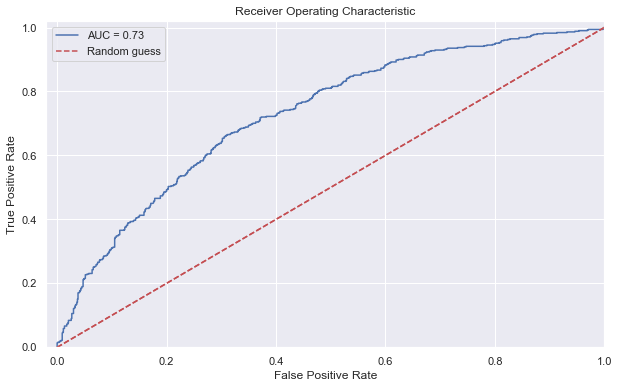

In [171]:
# plot the  ROC curve again for dataset with zero importance features removed

# calculate the fpr and tpr for all thresholds of the classification

abc_r=AdaBoostClassifier().fit(X_train_r,y_train_r)
pred_r = abc_r.predict_proba(X_test_r)[:,1]
fpr_r, tpr_r, threshold_r = metrics.roc_curve(y_test_r, pred_r)
roc_auc_r = metrics.auc(fpr_r, tpr_r)

#add notation and format the plot
plt.plot(fpr_r, tpr_r, label = 'AUC = %0.2f' % roc_auc_r)
plt.plot([0, 1], [0, 1], 'r--', label='Random guess');plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1]);plt.ylim([0, 1.02]);plt.legend()
plt.ylabel('True Positive Rate');plt.xlabel('False Positive Rate');plt.title('Receiver Operating Characteristic')
plt.show()

As might be expected, the most important to model all the same 4 features. The importance of attributes is not the best method for interpreting a model, but it allows one to understand the main factors that the model uses for predictions. feature importance